# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=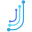)](https://jvelezmagic.com/)

![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

La línea de código “%run pandas-missing-extension.ipynb” se utiliza en el entorno de Deepnote para ejecutar un archivo de notebook de Jupyter llamado “pandas-missing-extension.ipynb”.

Este comando carga y ejecuta el notebook en la sesión actual de Deepnote, lo que significa que cualquier código contenido en el notebook se ejecutará como si se hubiera copiado y pegado directamente en la sesión de Deepnote.

En particular, es probable que el notebook “pandas-missing-extension.ipynb” contenga definiciones de funciones o variables que se utilizarán posteriormente en la sesión de Deepnote. Al ejecutar el notebook, se asegura que estas definiciones estén disponibles en la sesión actual y puedan ser utilizadas en el análisis de datos o en cualquier otro trabajo que se esté realizando en Deepnote.

Para poder ejecutar esa linea de codigo necesitas instalar jupyter en tu ambiente:

In [3]:
# !pip install jupyter

## Configurar el aspecto general de las gráficas del proyecto

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [5]:
print(
    None or True,
    None or False,
    None == None, 
    None is None,
    # None + True,
    # None / False,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [6]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    type(np.nan), # Interesante, es un float,
    np.isnan(np.nan),
    sep="\n"
)

nan
False
True
nan
<class 'float'>
True


En Numpy, los valores faltantes se representan con nan y tienen definido operaciones con valores numericos ya que es de tipo float. Por otro lado, al comparar los None arroja False es decir, que no son el mismo objeto y al compararlos mediante la funcion is arroja True es decir que un nan esta contenido en otro nana. Tener cuidado

### Pandas

In [7]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

In [8]:
test_missing_df.isna()

x      y
0  False  False
1  False  False
2   True   True
3   True   True
4   True   True

In [9]:
test_missing_df.isnull()

x      y
0  False  False
1  False  False
2   True   True
3   True   True
4   True   True

In [10]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [11]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan]) # En series temporales NaN ahora es NaT

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [12]:
pd.Series([-1]).isnull() # En algunas ocasiones el -1 es detectado como un valor faltante

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [13]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [14]:
!wget -O ./data/pima-indians-diabetes.csv {pima_indians_diabetes_url} -q

In [15]:
diabetes_df = pd.read_csv(
    "./data/pima-indians-diabetes.csv",
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome"
    ]
)

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [16]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [17]:
datasets_dfs = {}

for dataset_name in datasets_names:
    dataset_file = f"{dataset_name}{extension}"
    dataset_output_file = f"./data/{dataset_file}"
    dataset_url = f"{base_url}{dataset_file}"

    !wget -O {dataset_output_file} {dataset_url} -q 

    datasets_dfs[f"{dataset_name}_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [18]:
datasets_dfs["oceanbuoys_df"]

year  latitude  longitude  sea_temp_c  air_temp_c   humidity  wind_ew  \
0    1997.0       0.0     -110.0   27.590000   27.150000  79.599998     -6.4   
1    1997.0       0.0     -110.0   27.549999   27.020000  75.800003     -5.3   
2    1997.0       0.0     -110.0   27.570000   27.000000  76.500000     -5.1   
3    1997.0       0.0     -110.0   27.620001   26.930000  76.199997     -4.9   
4    1997.0       0.0     -110.0   27.650000   26.840000  76.400002     -3.5   
..      ...       ...        ...         ...         ...        ...      ...   
731  1993.0      -2.0     -110.0   24.780001   24.620001  90.800003     -4.4   
732  1993.0      -2.0     -110.0   24.879999   24.500000  91.099998     -3.0   
733  1993.0      -2.0     -110.0   25.120001   24.889999  89.699997     -4.0   
734  1993.0      -2.0     -110.0   25.160000   24.930000  89.500000     -4.3   
735  1993.0      -2.0     -110.0   25.139999   24.770000  87.900002     -4.6   

     wind_ns  
0        5.4  
1        5.3  
2        4.5  
3        2.5  
4        4.1  
..       ...  
731      1.7  
732      0.2  
733      1.1  
734      2.5  
735      2.3  

[736 rows x 8 columns]

#### Incluir conjuntos de datos en nuestro ambiente local

In [19]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [20]:
oceanbuoys_df.shape, riskfactors_df.shape, pedestrian_df.shape

((736, 8), (245, 34), (37700, 9))

In [21]:
oceanbuoys_df.info() # Nos sirve para ver si tiene valores faltantes en sus columnas o no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        736 non-null    float64
 1   latitude    736 non-null    float64
 2   longitude   736 non-null    float64
 3   sea_temp_c  733 non-null    float64
 4   air_temp_c  655 non-null    float64
 5   humidity    643 non-null    float64
 6   wind_ew     736 non-null    float64
 7   wind_ns     736 non-null    float64
dtypes: float64(8)
memory usage: 46.1 KB


## Tabulación de valores faltantes

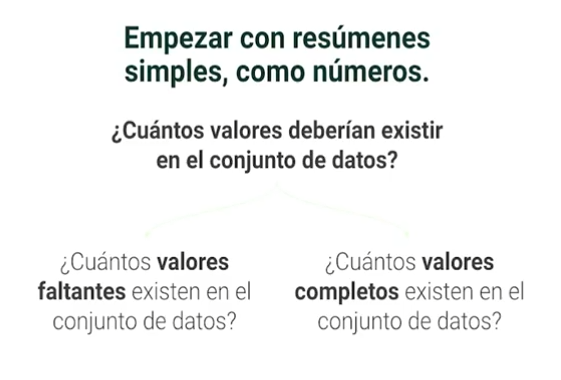

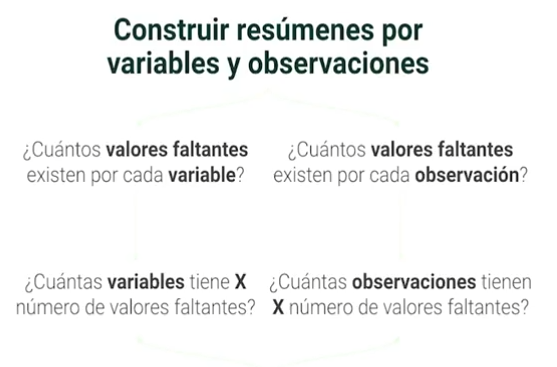

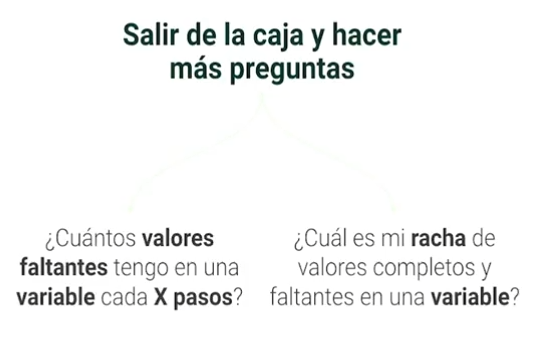

In [22]:
pedestrian_df.isna()

hourly_counts  date_time   year  month  month_day  week_day   hour  \
0              False      False  False  False      False     False  False   
1              False      False  False  False      False     False  False   
2              False      False  False  False      False     False  False   
3              False      False  False  False      False     False  False   
4              False      False  False  False      False     False  False   
...              ...        ...    ...    ...        ...       ...    ...   
37695          False      False  False  False      False     False  False   
37696          False      False  False  False      False     False  False   
37697          False      False  False  False      False     False  False   
37698          False      False  False  False      False     False  False   
37699          False      False  False  False      False     False  False   

       sensor_id  sensor_name  
0          False        False  
1          False        False  
2          False        False  
3          False        False  
4          False        False  
...          ...          ...  
37695      False        False  
37696      False        False  
37697      False        False  
37698      False        False  
37699      False        False  

[37700 rows x 9 columns]

### Resúmenes básicos de valores faltantes

In [23]:
riskfactors_df.size

8330

#### Número total de valores completos (sin observaciones faltantes)

In [24]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [25]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [26]:
riskfactors_df.missing.missing_variable_summary()

variable  n_missing  n_cases  pct_missing
0              state          0      245     0.000000
1                sex          0      245     0.000000
2                age          0      245     0.000000
3         weight_lbs         10      245     4.081633
4        height_inch          2      245     0.816327
5                bmi         11      245     4.489796
6            marital          1      245     0.408163
7           pregnant        215      245    87.755102
8           children          0      245     0.000000
9          education          1      245     0.408163
10        employment          0      245     0.000000
11            income          0      245     0.000000
12           veteran          3      245     1.224490
13          hispanic          2      245     0.816327
14    health_general          0      245     0.000000
15   health_physical          0      245     0.000000
16     health_mental          0      245     0.000000
17       health_poor        113      245    46.122449
18      health_cover          0      245     0.000000
19      provide_care          3      245     1.224490
20  activity_limited          3      245     1.224490
21         drink_any          2      245     0.816327
22        drink_days        134      245    54.693878
23     drink_average        135      245    55.102041
24         smoke_100          2      245     0.816327
25        smoke_days        128      245    52.244898
26        smoke_stop        212      245    86.530612
27        smoke_last        161      245    65.714286
28        diet_fruit          8      245     3.265306
29        diet_salad          8      245     3.265306
30       diet_potato          8      245     3.265306
31       diet_carrot          8      245     3.265306
32    diet_vegetable          8      245     3.265306
33        diet_juice          8      245     3.265306

La ultima columna es el porcentaje de valores faltantes con respecto a los totales

###### Tabulación del resumen por variable

In [27]:
riskfactors_df.missing.missing_variable_table()

n_missing_in_variable  n_variables  pct_variables
0                       0           10      29.411765
1                       8            6      17.647059
2                       2            4      11.764706
3                       3            3       8.823529
4                       1            2       5.882353
5                      10            1       2.941176
6                      11            1       2.941176
7                     113            1       2.941176
8                     128            1       2.941176
9                     134            1       2.941176
10                    135            1       2.941176
11                    161            1       2.941176
12                    212            1       2.941176
13                    215            1       2.941176

#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [28]:
riskfactors_df.missing.missing_case_summary()

case  n_missing  pct_missing
0       0          6    16.666667
1       1          6    16.666667
2       2          7    19.444444
3       3         12    33.333333
4       4          5    13.888889
..    ...        ...          ...
240   240          6    16.666667
241   241          5    13.888889
242   242          3     8.333333
243   243          2     5.555556
244   244          3     8.333333

[245 rows x 3 columns]

###### Tabulación del resumen por caso

In [29]:
riskfactors_df.missing.missing_case_table()

n_missing_in_case  n_cases   pct_case
0                   4       49  20.000000
1                   5       45  18.367347
2                   7       39  15.918367
3                   6       36  14.693878
4                   2       31  12.653061
5                   3       30  12.244898
6                   1        4   1.632653
7                   8        3   1.224490
8                  12        3   1.224490
9                  15        2   0.816327
10                  9        1   0.408163
11                 10        1   0.408163
12                 11        1   0.408163

### Intervalos de valores faltantes

In [30]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

span_counter  n_missing  n_complete  pct_missing  pct_complete
0             0          1          49     2.000000     98.000000
1             1          5          45    10.000000     90.000000
2             2          1          49     2.000000     98.000000
3             3          1          49     2.000000     98.000000
4             4          2          43     4.444444     95.555556

Con esto podemos detectar si en algun punto de nuestro data set se acumulan valores faltantes de una variable. Podemos ordenar nuestro dataset por ejemplo con la fecha y asi ver en que fecha se acumulan mas valores faltantes

### _Run length_ de valores faltantes

In [31]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs" # Variable a analizar los valores faltantes
    )
)

run_length     is_na
0           14  complete
1            1   missing
2           45  complete
3            1   missing
4            5  complete
5            1   missing
6           12  complete
7            1   missing
8           10  complete
9            2   missing
10          40  complete
11           1   missing
12          53  complete
13           1   missing
14          14  complete
15           1   missing
16          31  complete
17           1   missing
18          11  complete

Con esto podemos detectar picos en nuestros valores faltantes y podremos hacernos la pregunta de pq fue que esto sucedio 

## Visualización inicial de valores faltantes

### Variables

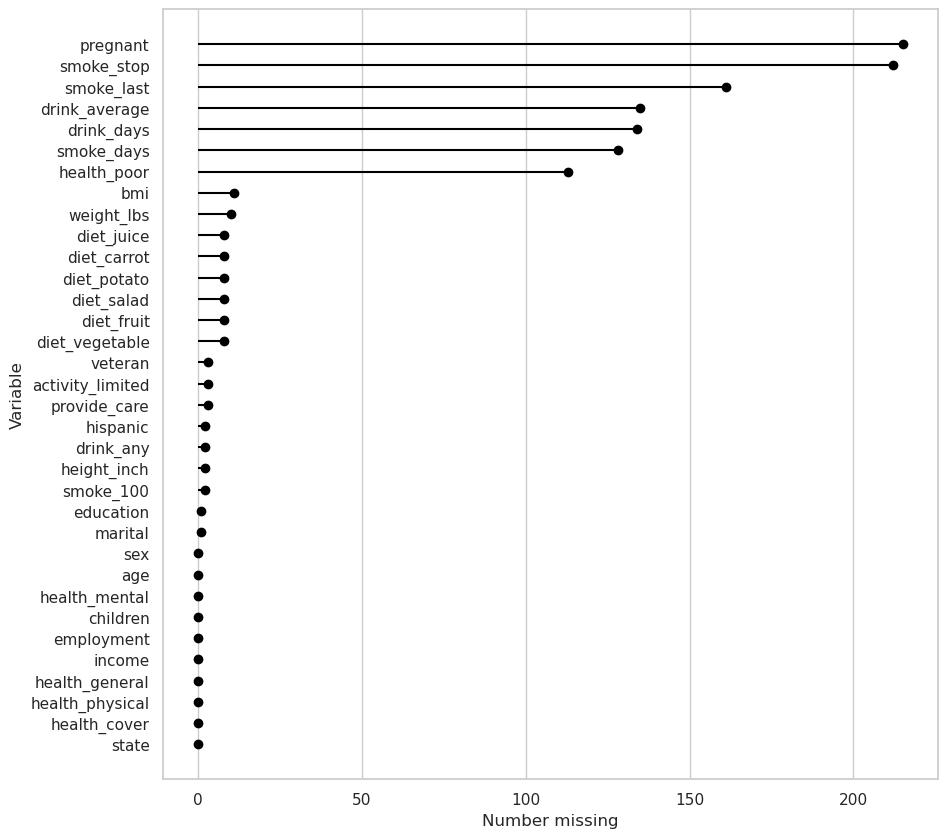

In [32]:
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


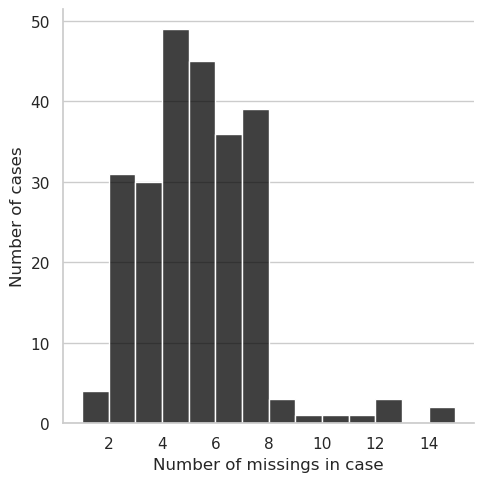

In [33]:
riskfactors_df.missing.missing_case_plot()

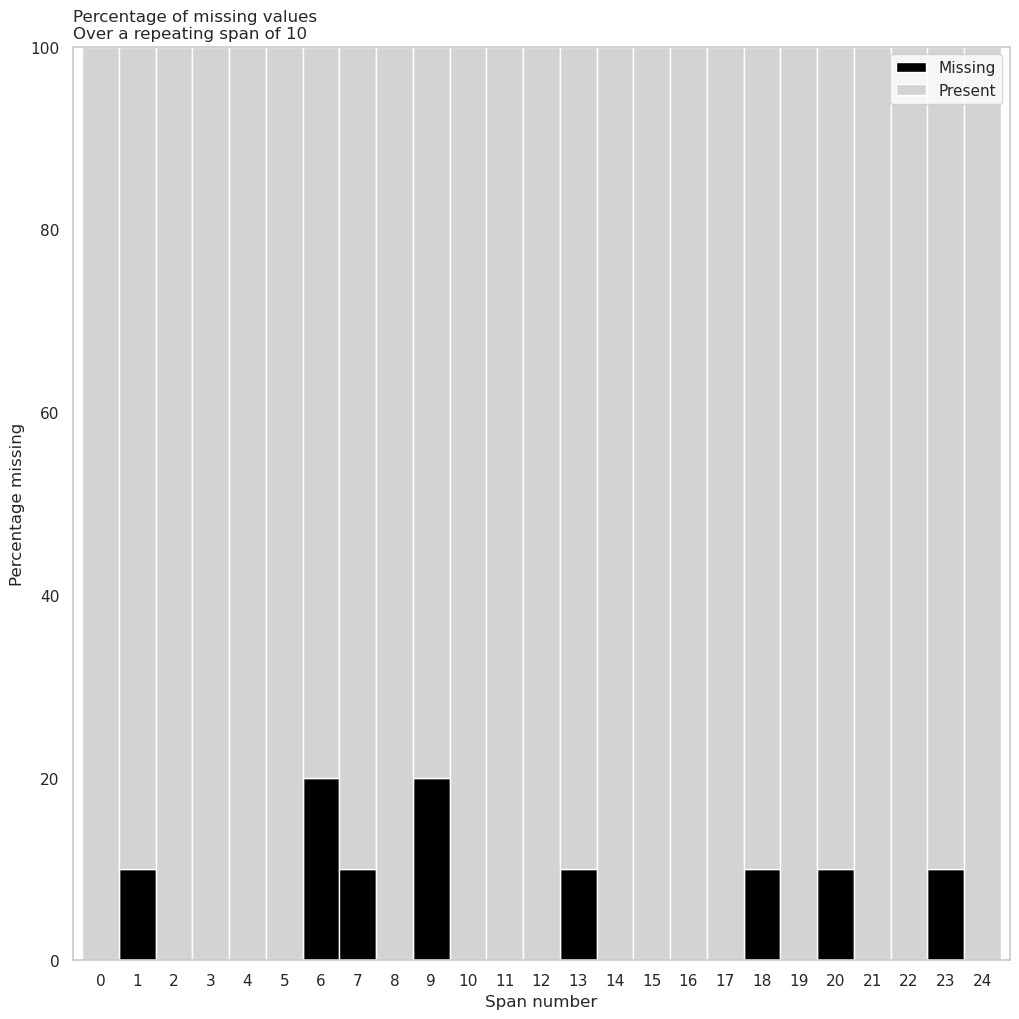

In [34]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot=0

    )
)

<Axes: >

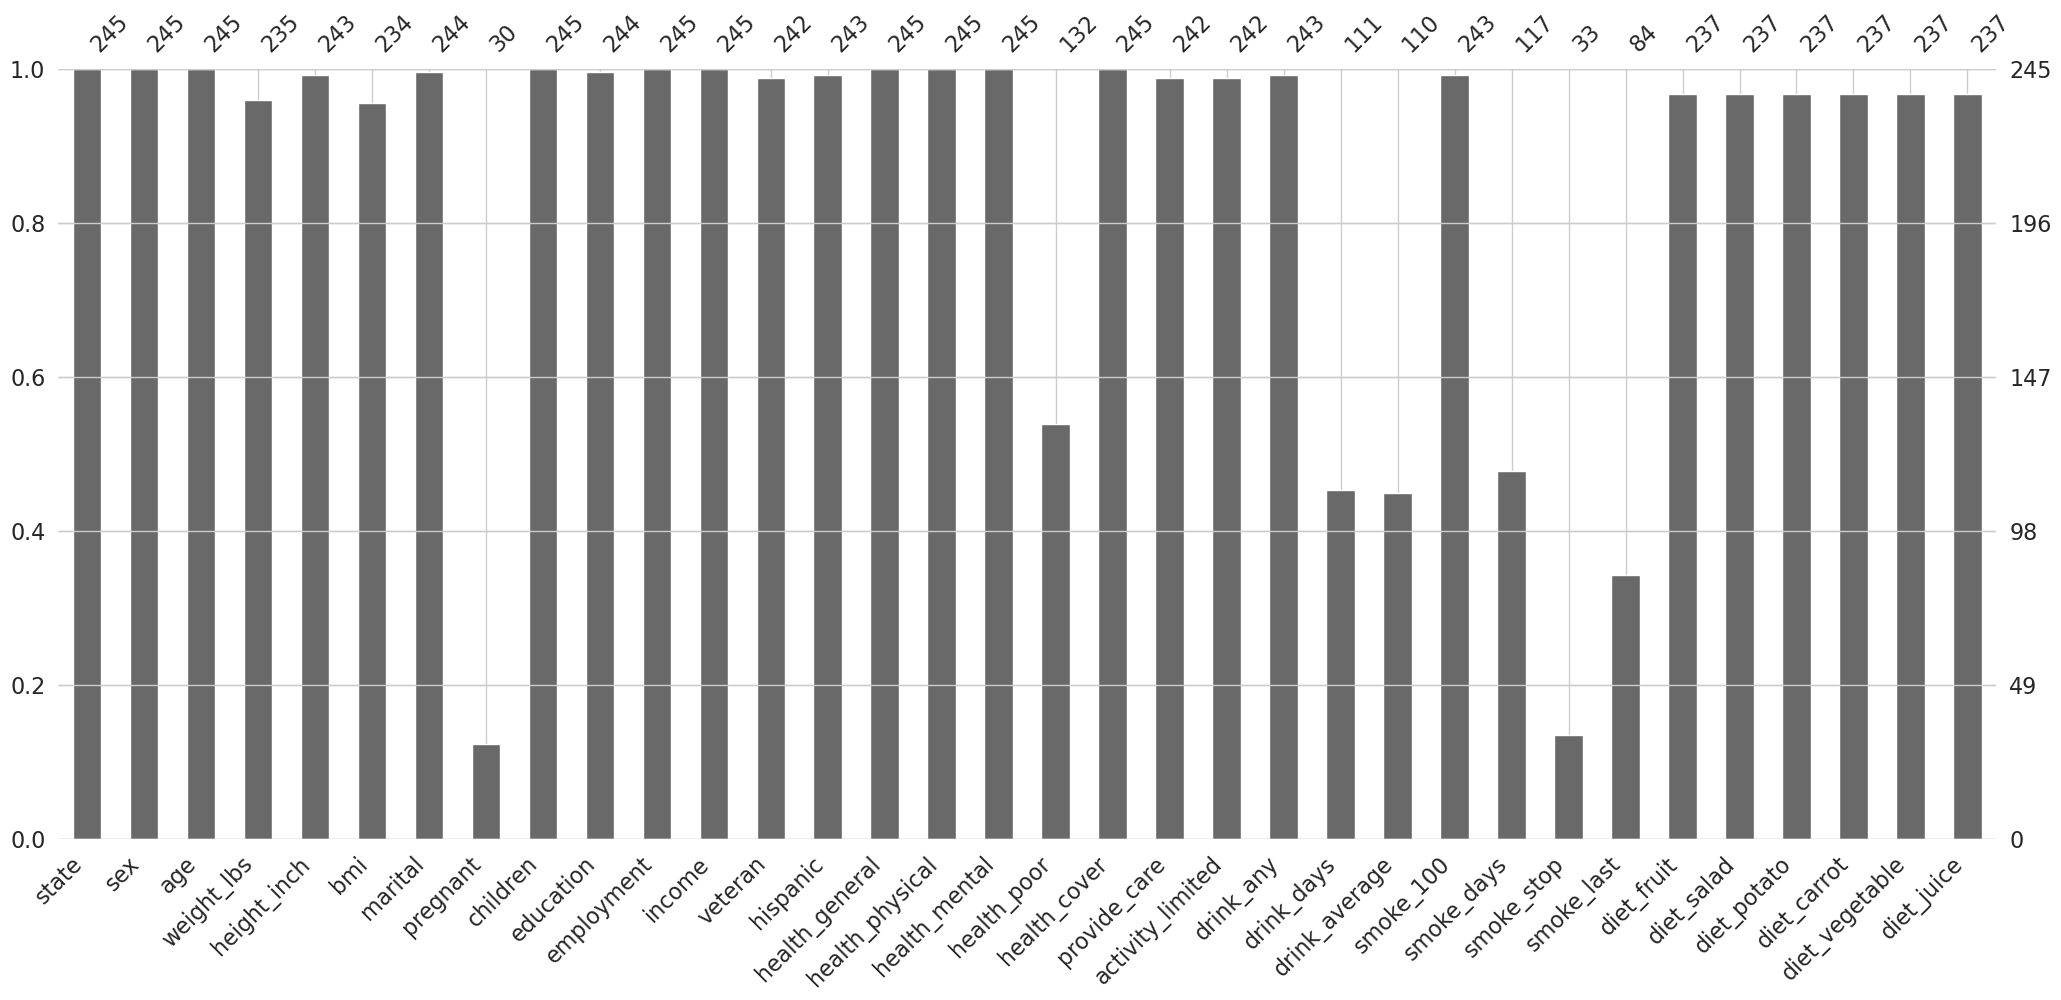

In [35]:
missingno.bar(df=riskfactors_df)

En esta grafica, mientras mas grande sea la barra gris, mas valores completos tiene esa variable en sus filas

<Axes: >

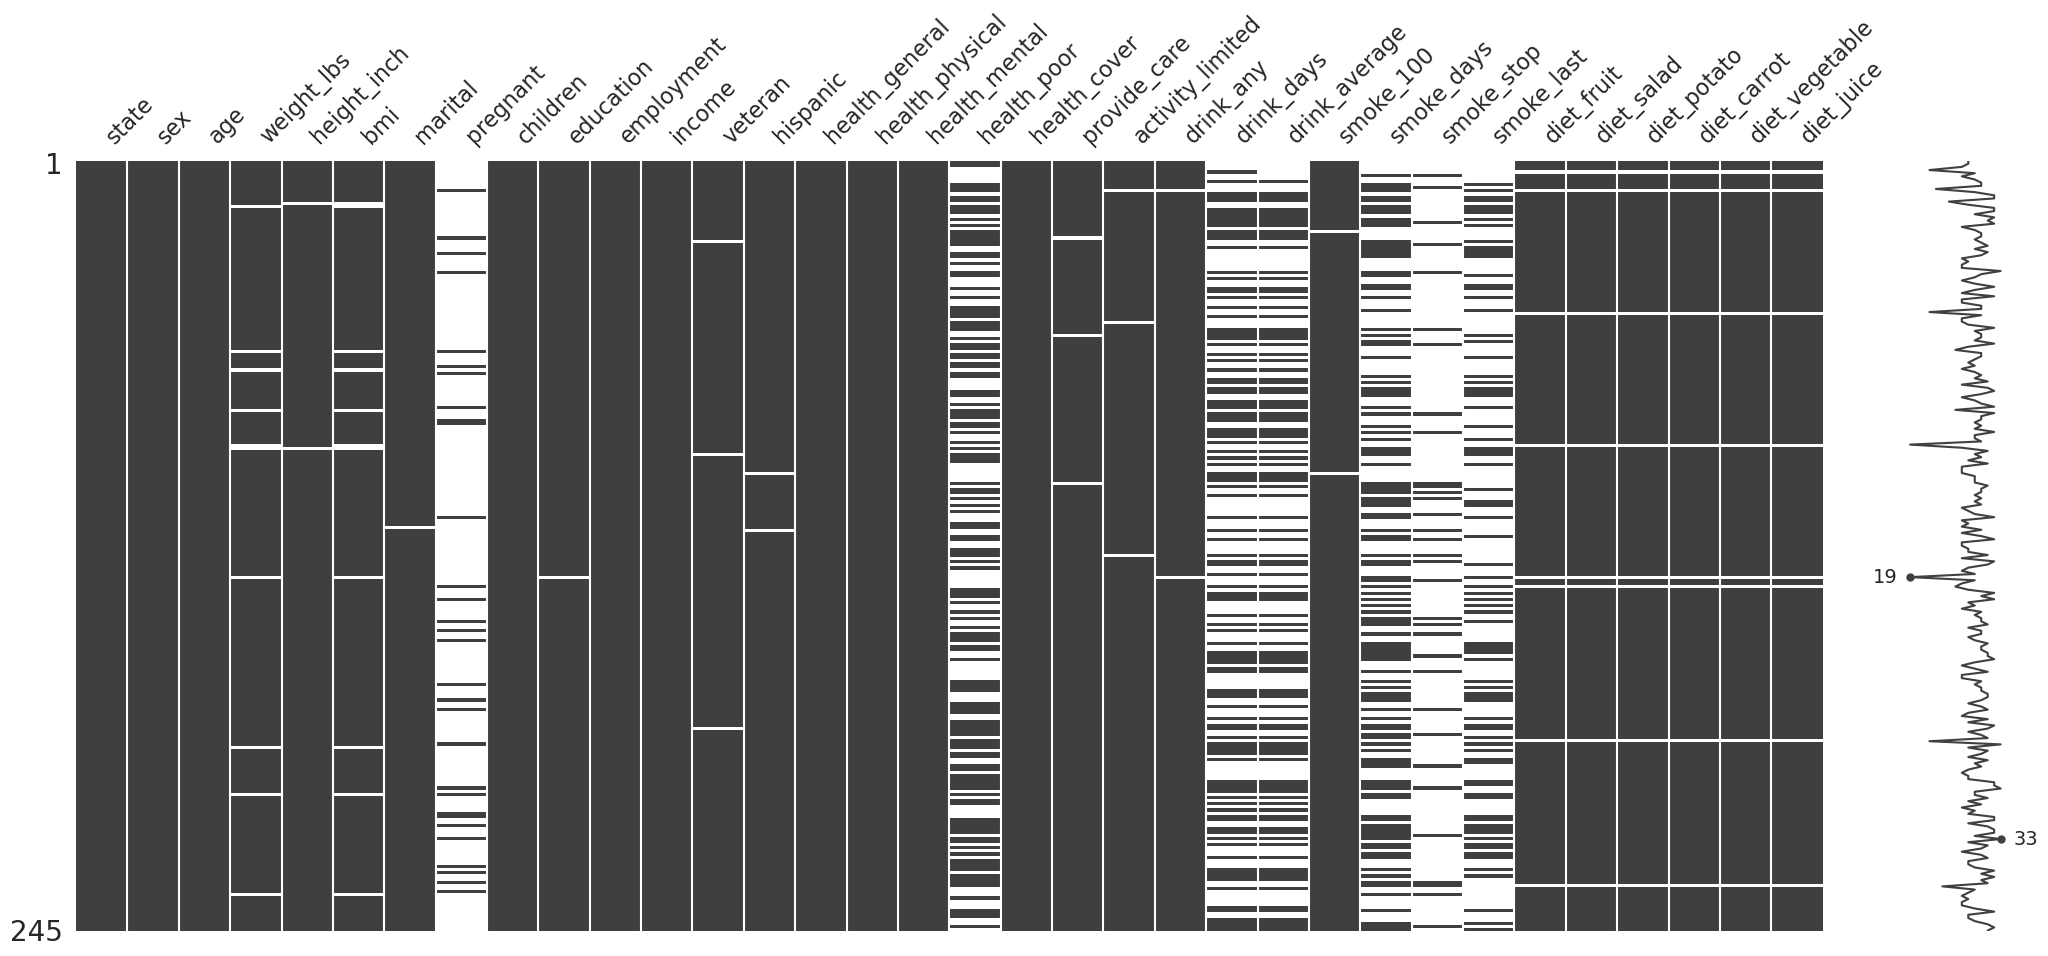

In [36]:
missingno.matrix(df=riskfactors_df)

Los espacios en blanco representan donde hay un valor faltante a lo largo del data set y el lado derecho nos indica donde hay mas valores faltnantes en toda las variables en conjunto

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

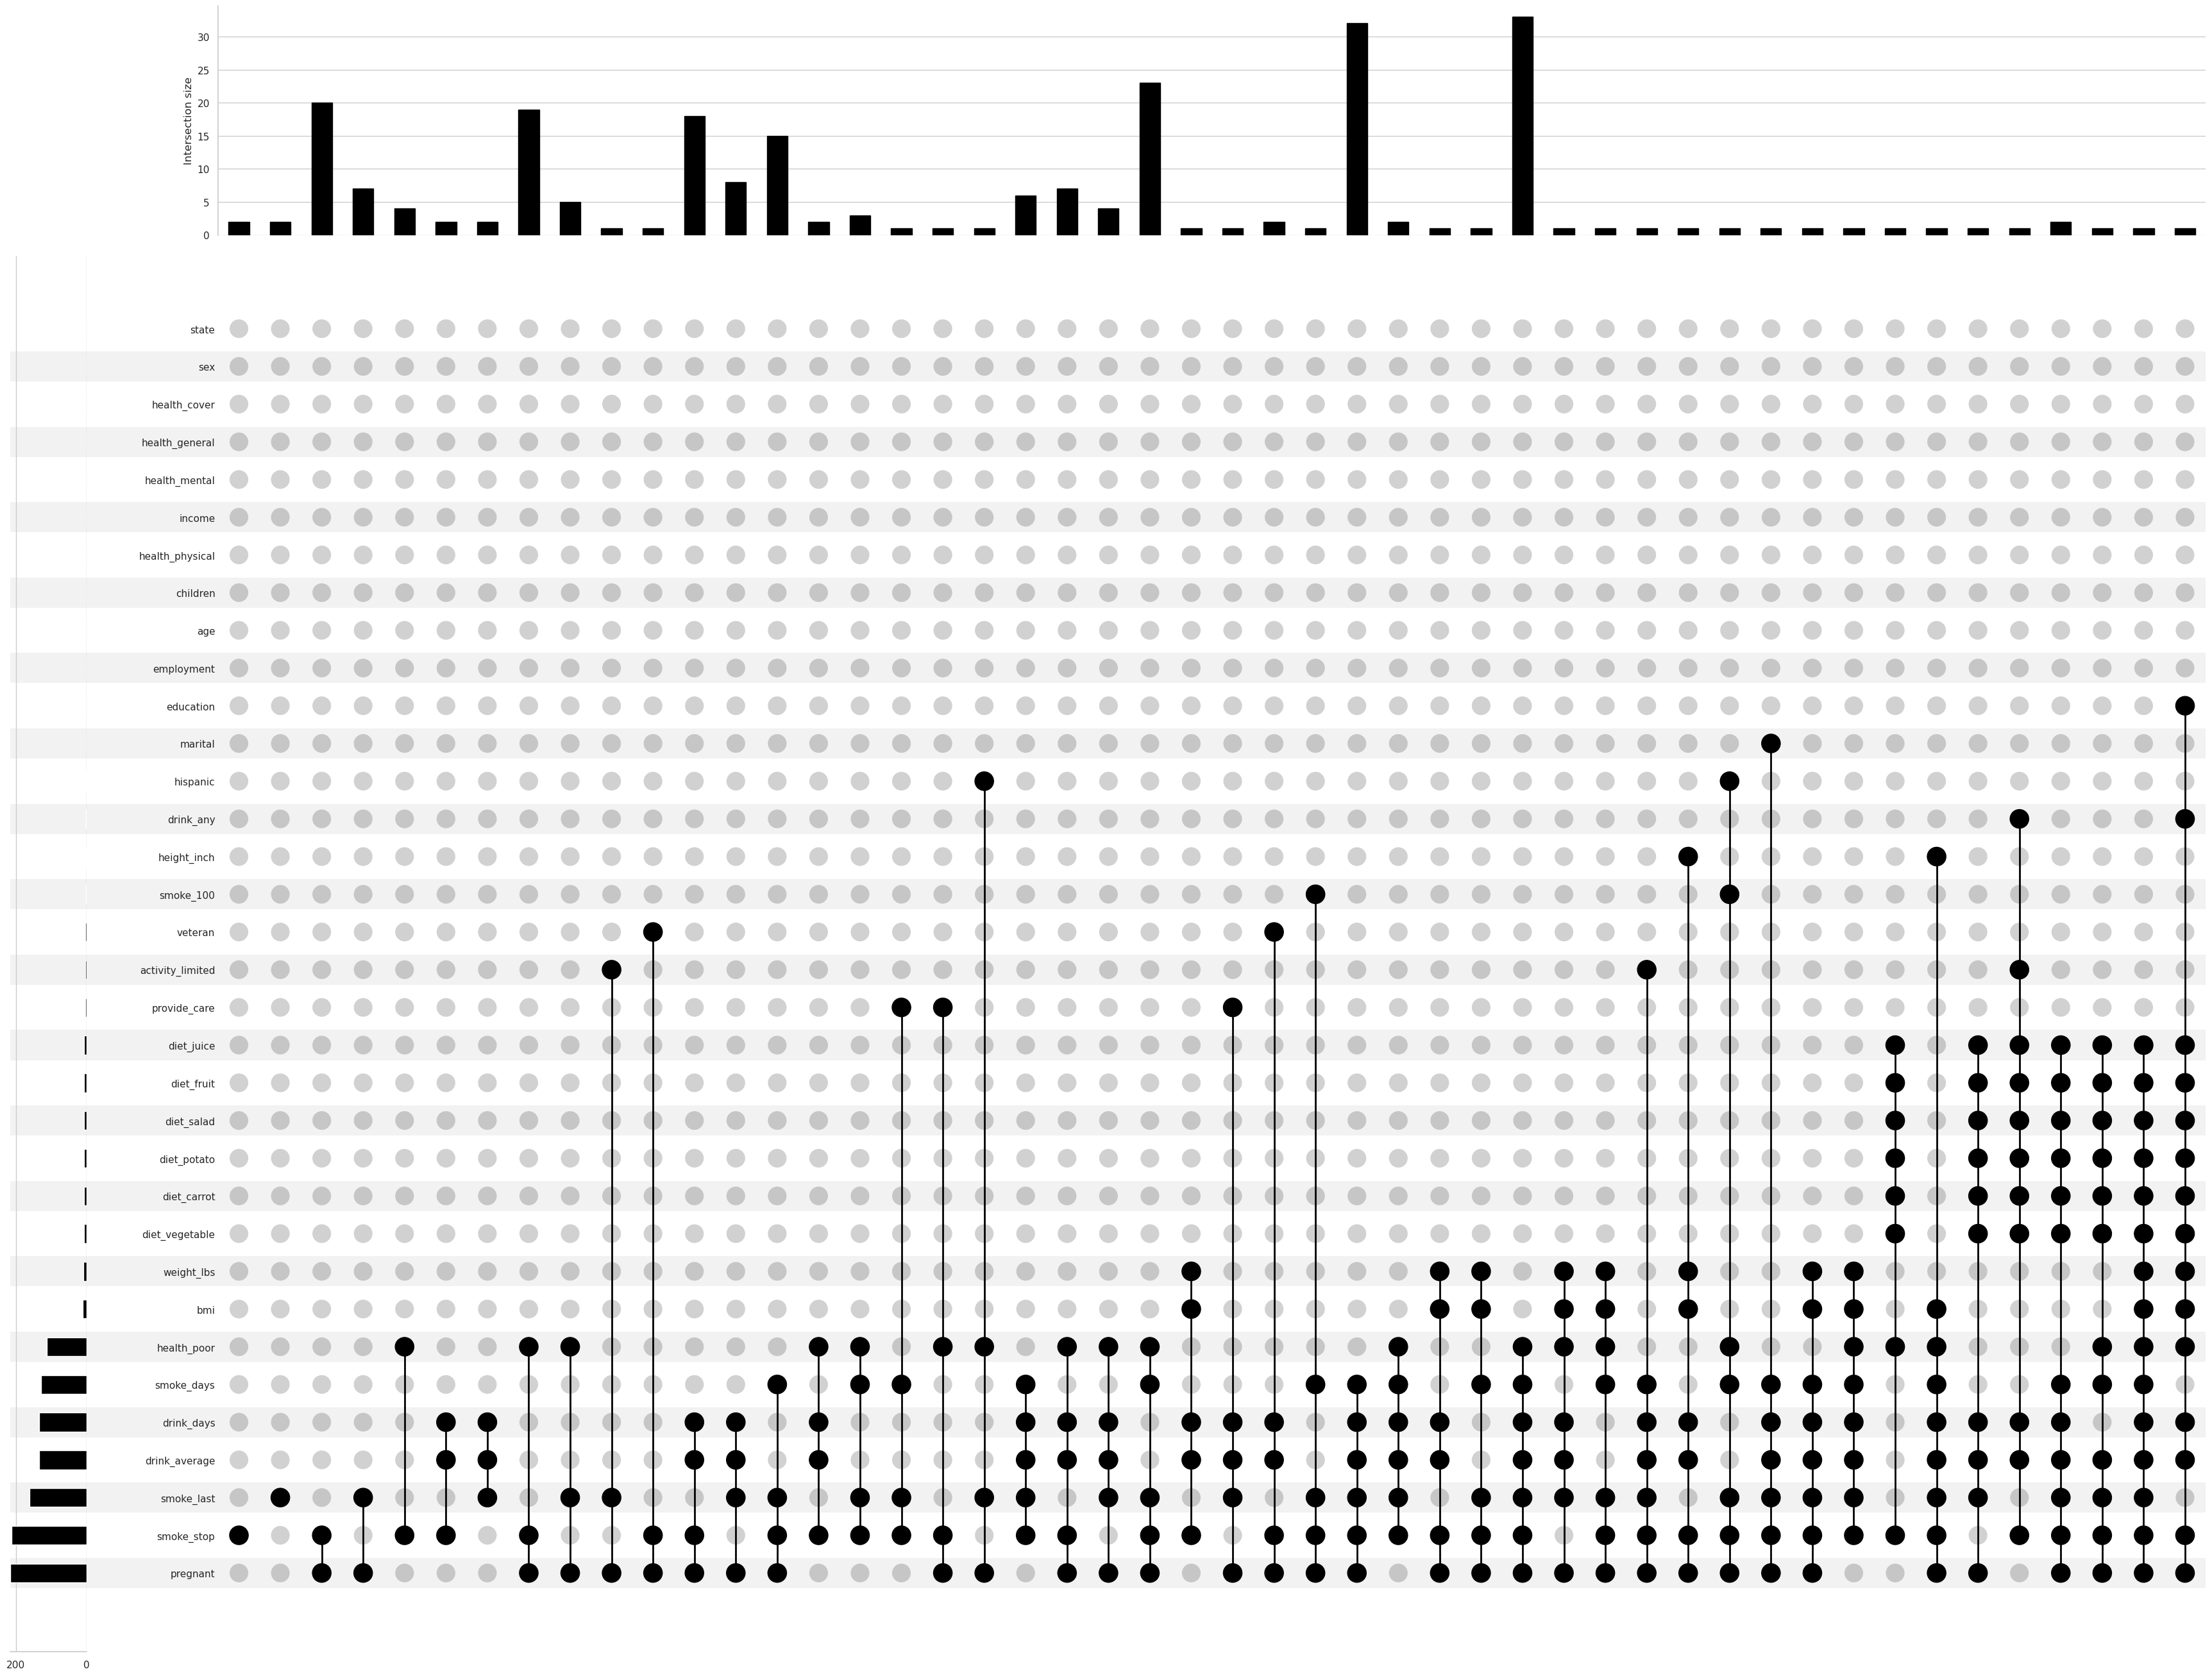

In [37]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=None,
        element_size = 60
    ) 
)

Las barras laterales nos indican cuantas valores faltantes tiene cada variable. Los puntos que unen las variables representan que en esas variables faltan valores al mismo tiempo. Las barras superiores indican que tanto se repite esa union entre las variables que les faltan los mismo valores en su respectiva observacion.

Puedes seleccionar las columnas que quieras remplazando None con una array de strings que contengan el nombre de las columnas que quieras

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [38]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [39]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [40]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  -99    E -101
4  -98    F   -1
5  -99    G   -1

In [41]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [42]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

Con esto nos damos cuenta que la primera columna deberia ser de enteros, pero la marca como si fuera de tipo objeto, lo cual no es correcto y quiere decir que ahi hay valores NA no detectados

#### Revisar valores únicos de los datos

In [43]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [44]:
(
    missing_data_example_df
    .select_dtypes(object) # Selecciona las columnas de ese tipo
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [45]:
pd.read_csv(
    "./data/missing_data_enconding_example.csv",
    na_filter=True,
    na_values=[-99, -1]
)
# Esta forma implica que tu ya conoces a la perfeccion como es que vienen los datos faltantes

x    y      z
0   1.0    A -100.0
1   3.0  NaN    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F    NaN
5   NaN    G    NaN

#### Sustitución global

In [46]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, "NA"],
        value=np.nan
    )
)
# Esta se usa cuando ya tenemos los datos cargados y simplemente queremos arreglar los valores faltantes que no detecta pandas

x    y      z
0   1.0    A -100.0
1   3.0  N/A    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F   -1.0
5   NaN    G   -1.0

#### Sustitución dirigida

In [47]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan
            }
        }
    )
)
# Supongamos que una variable el -99 no es realmente un valor NA, por lo tanto a esa columna no lo queremos aplicar, para eso sirve esto

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  NaN    E -101
4  -98    F   -1
5  NaN    G   -1

## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

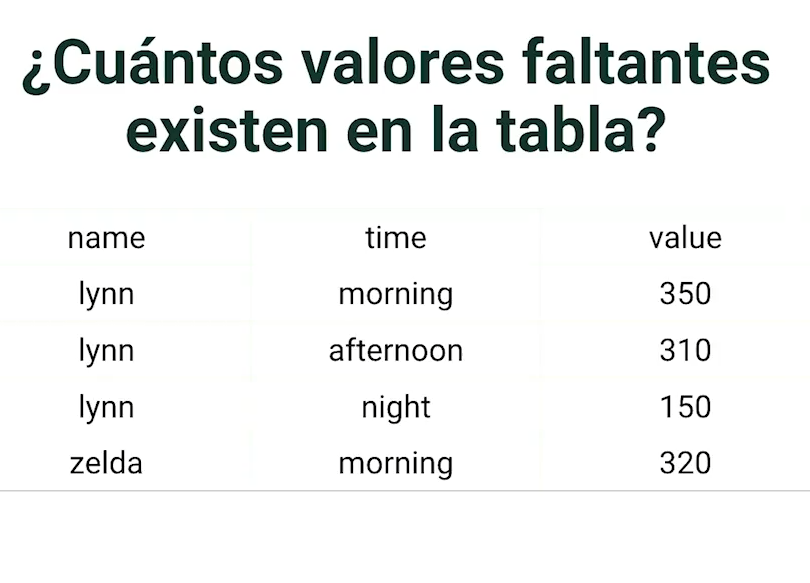

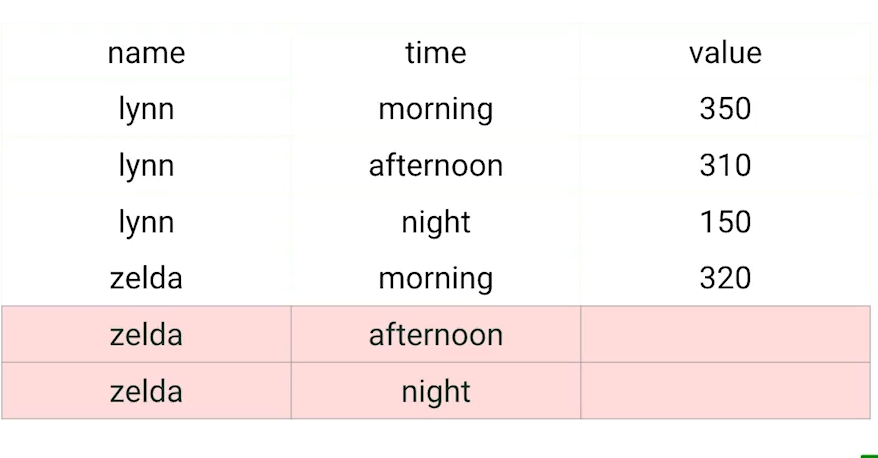

Implicitamente estos valores faltantes estan ahi, pq si te fijas cada valor de name debe tener 3 valores de time, esto quiere que decir que los valores de time estan ya predefinidos para cualquier valor de name, por lo tanto nos faltan valores de la columna value.

In [48]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0

Aqui no notamos nada raro, solo que tenemos un valor NaN

### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [49]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",
        names_from="time",
        values_from="value"
    )
)

name  afternoon  morning  night
0   lynn      310.0    350.0    NaN
1  zelda        NaN    320.0    NaN

Al pivotear la tabla notamos que si faltan mas valores :O

Podemos pivotear esta misma tabla con diferentes variables, pero ten en cuenta que siempre sera de 2 :)

#### Cuantificar ocurrencias de n-tuplas (no se porque se dice que "n-tuplas" pero pos ni modo)

In [50]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"] # La variable de donde contara sus valores
    )
    .reset_index(name="n")
    .query("n < 3") # Aqui ya estamos filtrando los valores que aparezcan menos de 3 veces, por lo que ya sabiamos de antemano que todos los valores de esa columna deben aparecer 3 veces. Con esto notaremos que tenemos valores faltantes implicitos
)

name  n
1  zelda  1

### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [115]:
(
    implicit_to_explicit_df
    # janitor
    .complete(
        "name",
        "time"
    )
)
# Basicamente le decimos que cada valor de la primera columna, debe tener todos los valores de la segunda columna y los acompleta

name       time  value
0        lynn    morning  350.0
1        lynn  afternoon    NaN
2         NaN    morning    NaN
3         NaN  afternoon  310.0
4         NaN  afternoon  350.0
5         NaN  afternoon  320.0
6       zelda    morning  320.0
7       zelda  afternoon    NaN
8  shadowsong    morning  310.0
9  shadowsong  afternoon    NaN

Como vemos, ya convirtio nuestros valores faltantes implicitos a explicitos

#### Limitar la exposición de n-tuplas de valores faltantes

In [52]:
(
    implicit_to_explicit_df
    .complete(
        {"name": ["lynn", "zelda"]},
        {"time" : ["morning", "afternoon"]}
    )
)
# Con esto seleccionamos los valores de cada columna con los que queramos explicitar valores faltantes. En este caso, night es irrelevante

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2  zelda    morning  320.0
3  zelda  afternoon    NaN
4   lynn      night    NaN

#### Rellenar los valores faltantes

In [53]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value="NA" # por defecto viene np.nan
    )
)

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night     NA
3  zelda    morning  320.0
4  zelda  afternoon     NA
5  zelda      night     NA

#### Limitar el rellenado de valores faltantes implícitos

In [54]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value=0,
        explicit=False # Le decimos que los valores que ya estaban explicitos no los rellene con ese valor, por defecto es True
    )
)
# Nos servira para detectar cuales ya teniamos explicitos y cuales eran explicitos

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0
4  zelda  afternoon    0.0
5  zelda      night    0.0

## Tipos de valores faltantes

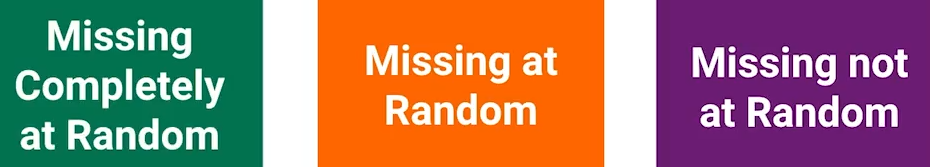

**Missing Completely at Random (MCAR)**
Son datos ocasionados por herramientas que dejan de funcionar sin ninguna razon detras. La localizacion de los valores faltantes ocurre completamente al azar, esto no depende de ningun otro dato

**Missing at Random (MAR)**
Los valores faltantes se consideran MAR si la probabilidad de que falte un valor está relacionada con otras variables observadas en el conjunto de datos, pero no está relacionada con el valor faltante en sí mismo. En este caso, aunque hay una relación entre los valores faltantes y otras variables, esta relación se puede explicar por variables que ya están presentes en el conjunto de datos.
Las herramientas necesitan mantenimiento periodico para asegurar su funcionamiento constante. En las fechas donde se le hace mantenimiento sabemos que ocurrira una falta de datos por lo que esos datos faltantes son localizados. La localizacion de los valores faltantes en el conjunto de datos depende de otros valores observados. 

**Missing not at Random (MNAR)**
Los valores faltantes se consideran MNAR si la probabilidad de que falte un valor está relacionada con el valor que falta en sí mismo o con otras variables no observadas. En este caso, la falta de un valor está vinculada a la información faltante, y esta información no se puede explicar por las variables presentes en el conjunto de datos.
Las herramientas tienen limites. Al tratar de hacer seguimientos fuera de su rango de medicion, se generan valores faltantes. La localizacion de los valores faltantes en el conjunto de datos dependen de los valores faltantes en si mismos. 

**Puedo tener seguridad sobre que mecanismo de valores faltantes es correcto para mis datos?**
No, no podemos tener seuridad sobre cual mecanismo incidio sobre los datos, pero a traves de analisis y conocimiento del tema puedes hacer suposiciones razonables

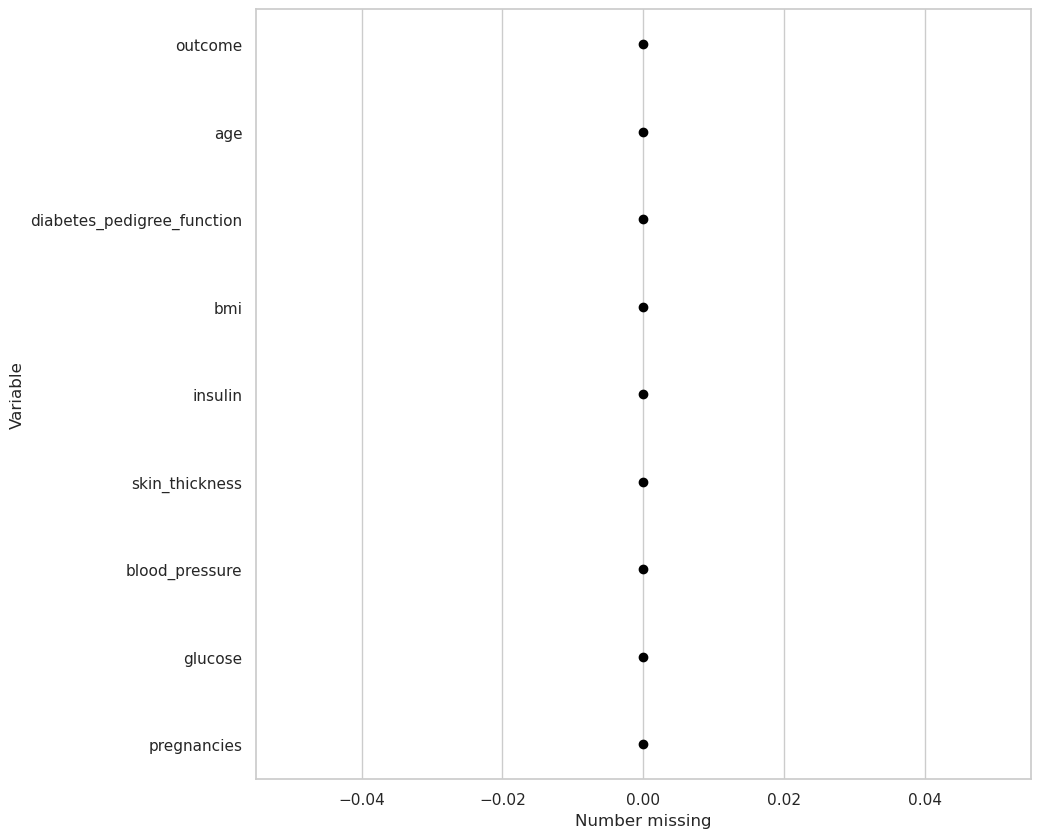

In [55]:
diabetes_df.missing.missing_variable_plot()

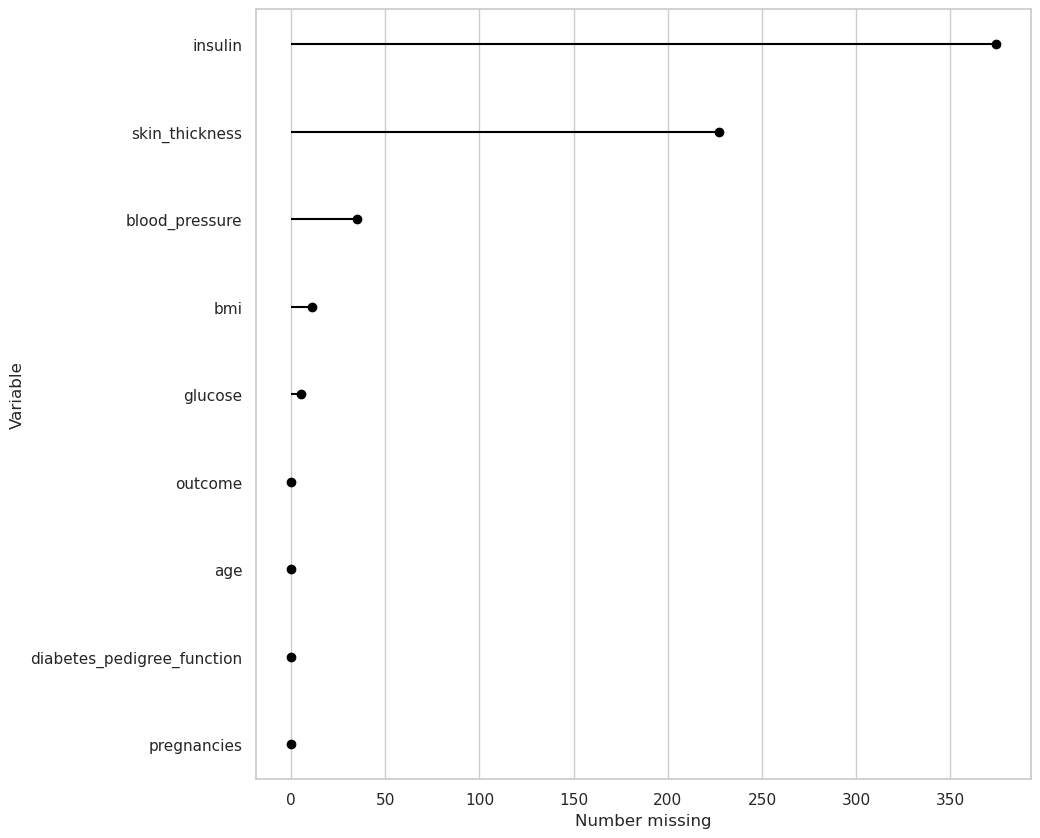

In [56]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

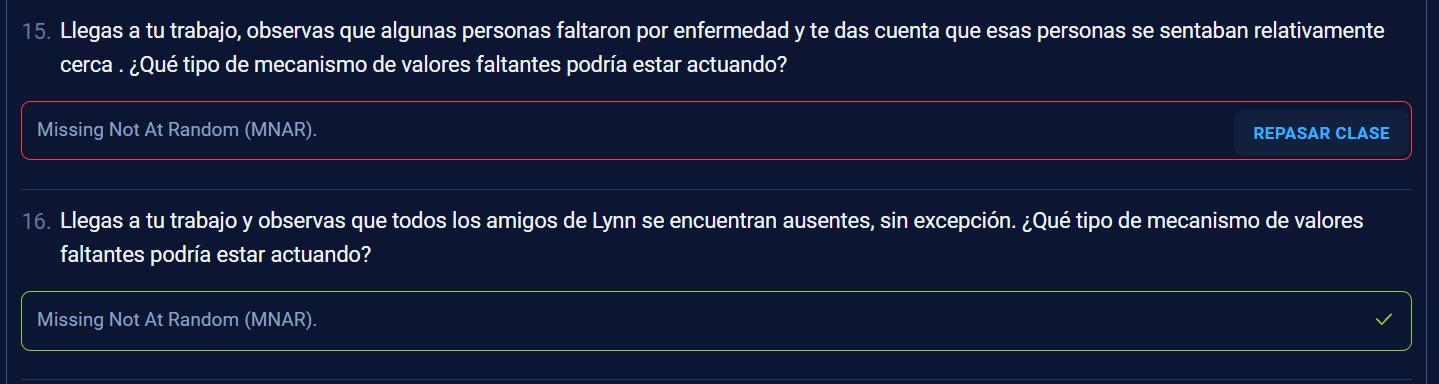

En la 15 deberia ser MAR porque la palabra clave "relativamente cerca" nos hace referencia a localizacion, lo cual tambien podria ser de tiempo. Mientras que en la 16 si es MNAR porque faltaron varios amigos de lynn pero no dan la razon de porque lo hicieron

### _Missing Completely At Random_ (MCAR)

<Axes: >

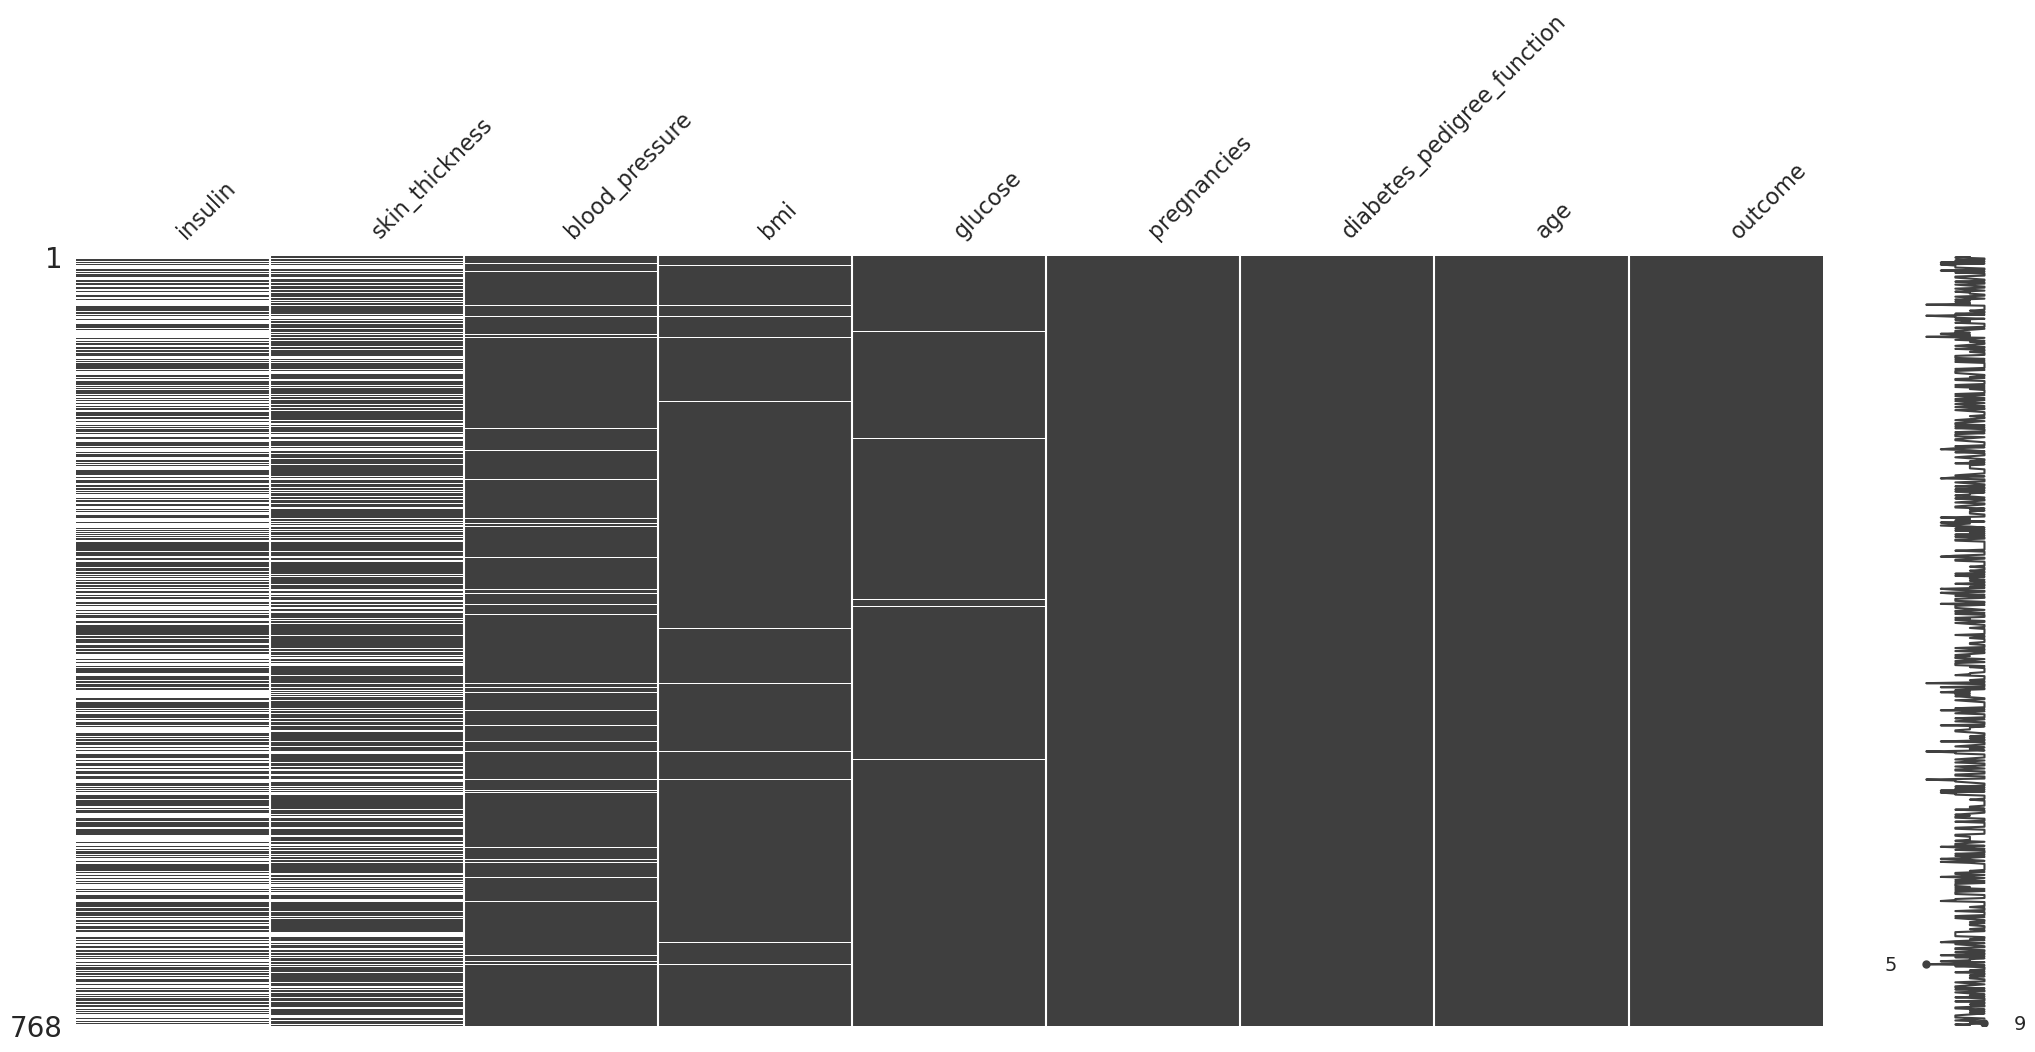

In [57]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

En la columna de glucosa vemos que faltan pocos valores, con esto podriamos decir que esto paso por MCAR

Se utiliza el método pipe() para redirigir el DataFrame resultante hacia la función missingno.matrix. missingno.matrix es una función proporcionada por la biblioteca missingno que se utiliza para visualizar los patrones de valores faltantes en el DataFrame. Generará una matriz de color en la que los valores faltantes se muestran como bloques en blanco.

### _Missing At Random_ (MAR)

<Axes: >

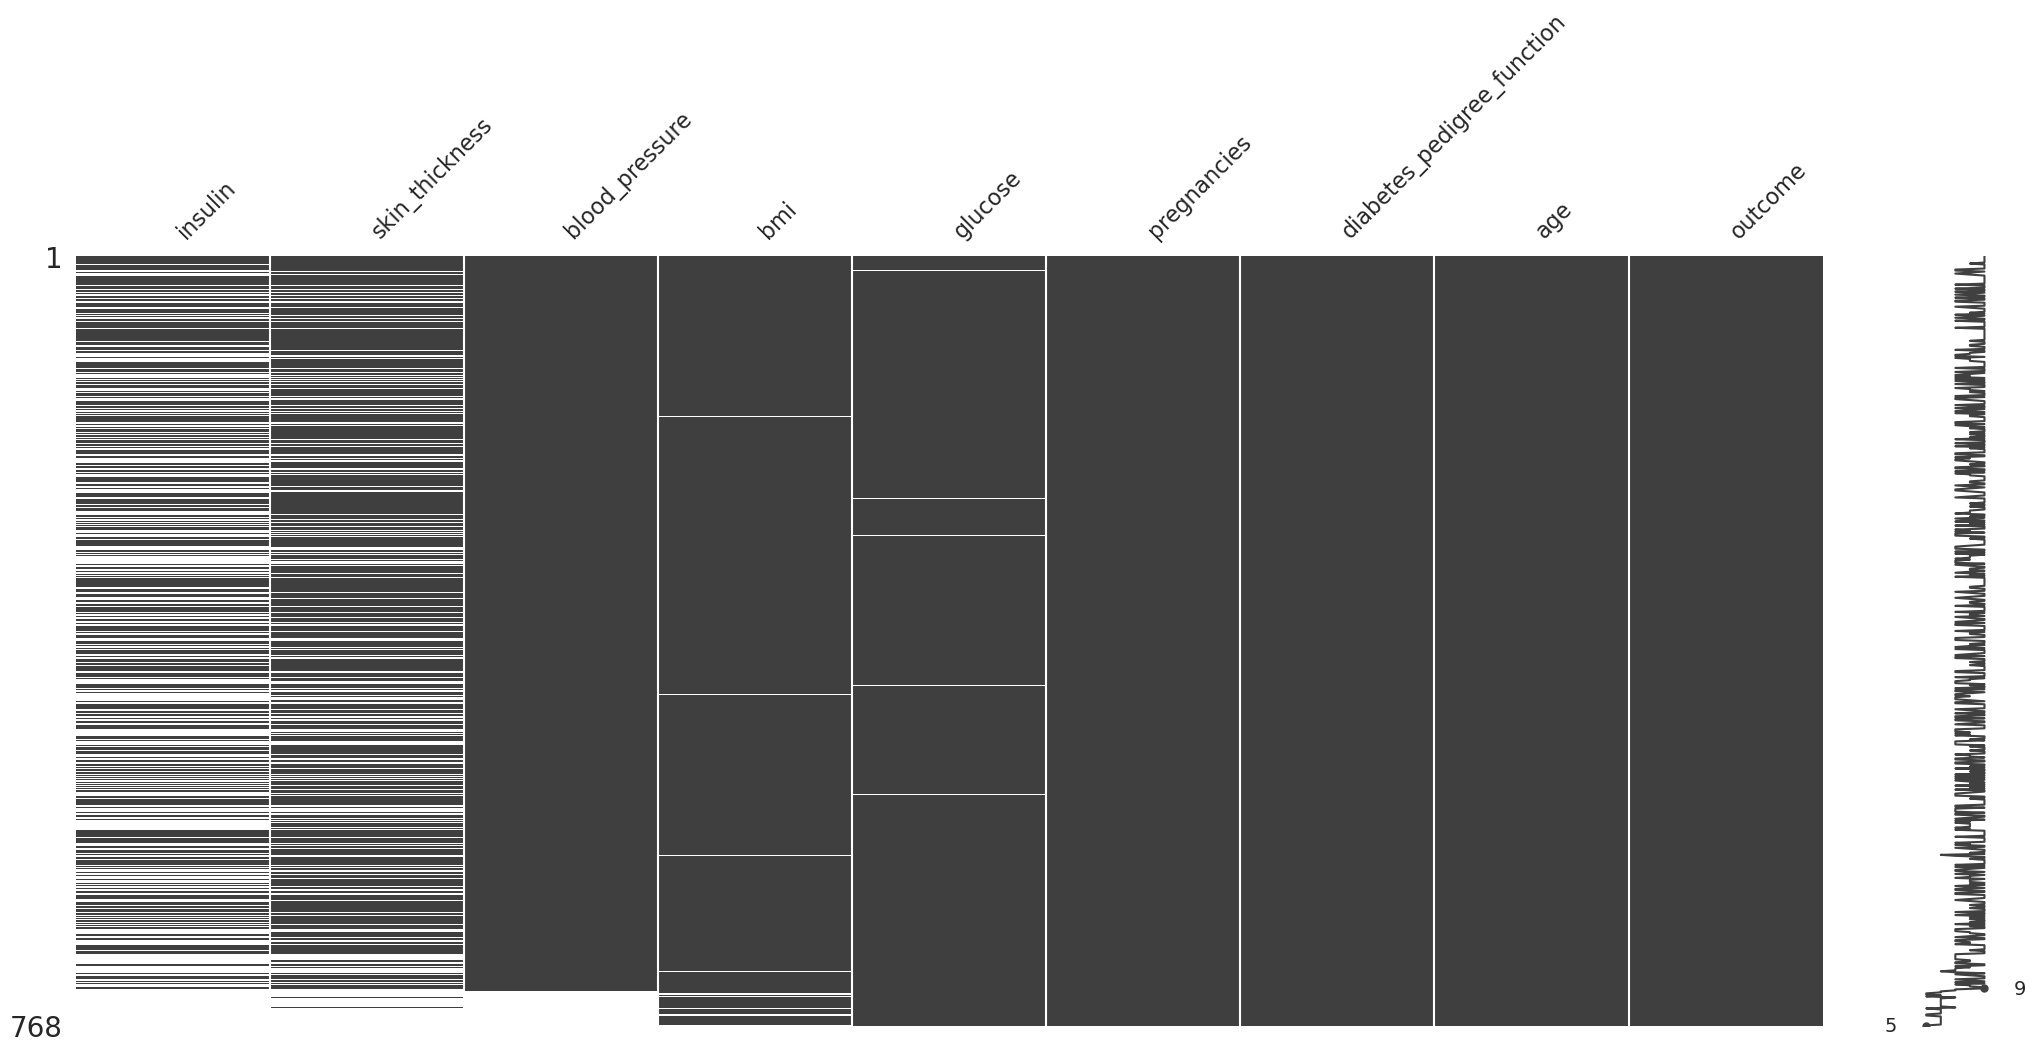

In [58]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .sort_values(by="blood_pressure")
    .pipe(missingno.matrix)
)

Podemos observar que en las primeras 3 columnas hasta abajo, falta datos en el mismo lugar. Esto puede que deba al hecho de que en una falten esos datos y que por lo tanto tampoco se hayan podido conseguir los de las otra variabes debido a que esten relacionadas. Con esto podemos decir que estos datos son MAR. Recuerda que son solo suposiciones.

### _Missing Not At Random_ (MNAR)

<Axes: >

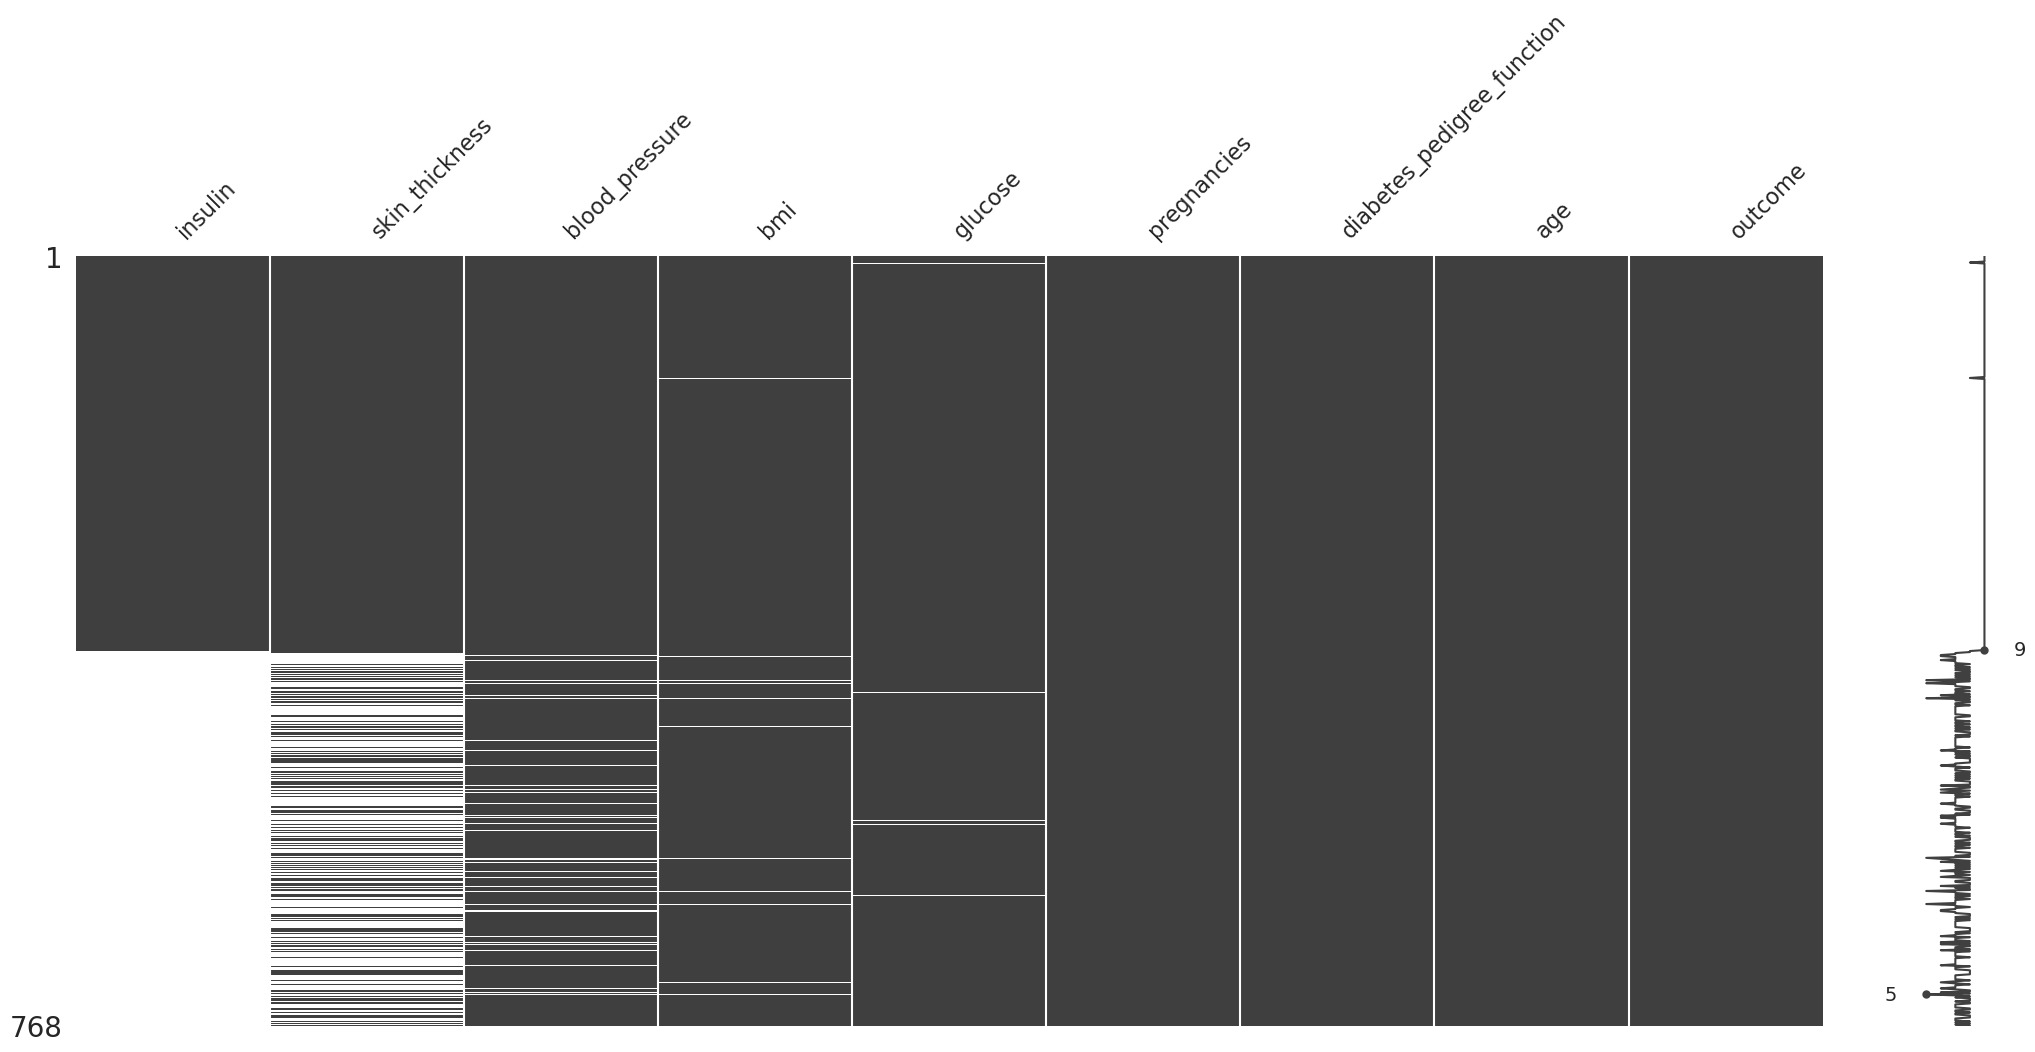

In [59]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .sort_values(by="insulin")
    .pipe(missingno.matrix)
)

Hay un rango de valores de insulina en la que estan la mayoria de los valores faltantes de las demas variables de lo que podemos concluir que es de tipo MNAR. 

No me quedo tan claro MNAR, queda pendiente por investigarlo bien

Puedes checar el siguiente video: https://www.youtube.com/watch?v=ARwHkq4t2q0

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

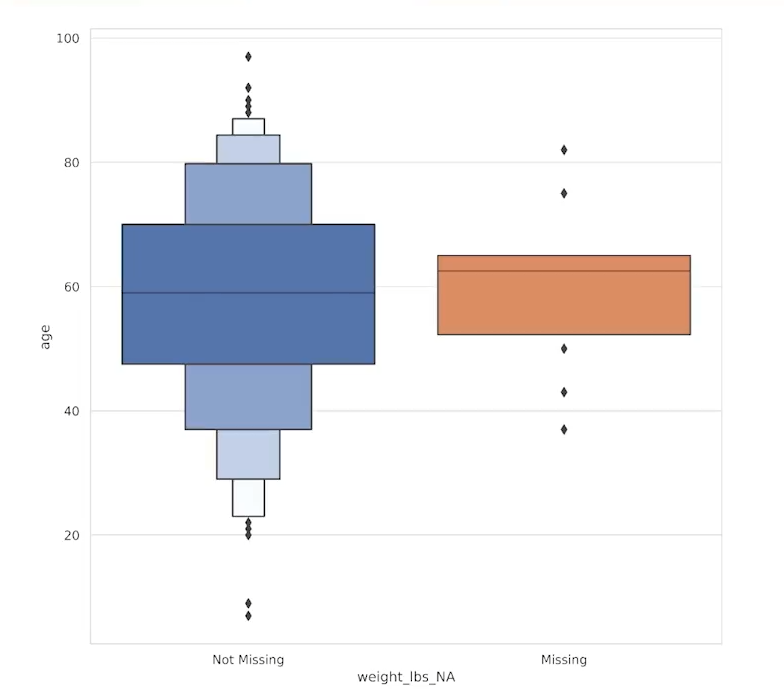

En esta visualizacion podemos notar que los valores faltantes de la variable weight_lbs no esta posiblemente relacionada con la edad, ya que parecen tener una distribucion mas o menos similar, solo que una mas pequeña que la otra.

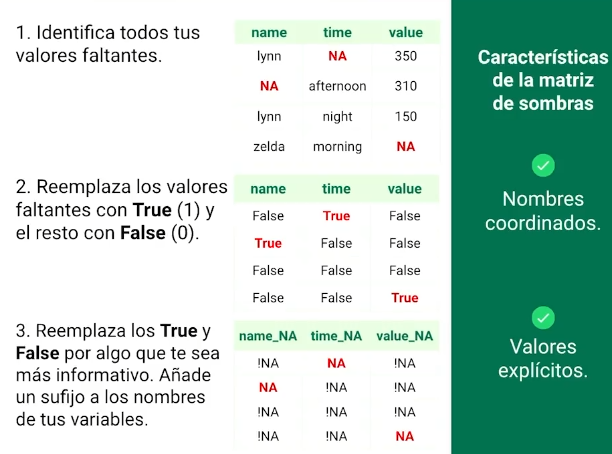

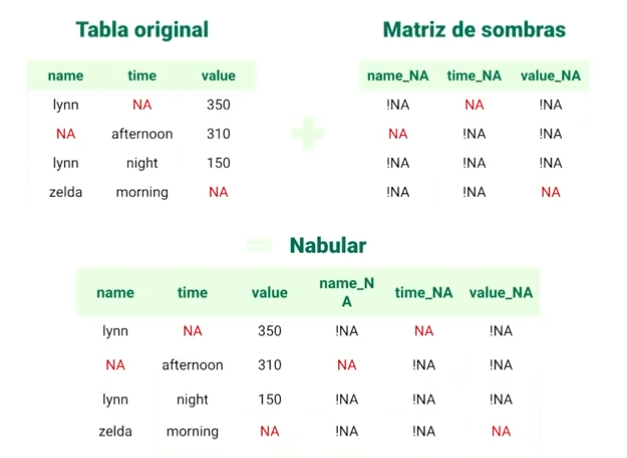

 ### Construcción de la matriz de sombras

In [60]:
(
    riskfactors_df
    .isna()
    .replace({
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not missing       Missing       Missing   
1           0         5  ...  Not missing       Missing       Missing   
2           0         4  ...  Not missing       Missing       Missing   
3           1         6  ...  Not missing       Missing       Missing   
4           0         5  ...  Not missing   Not missing   Not missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not missing       Missing       Missing   
241         2         4  ...  Not missing       Missing       Missing   
242         0         6  ...  Not missing   Not missing       Missing   
243         0         4  ...  Not missing   Not missing   Not missing   
244         0         4  ...  Not missing   Not missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not missing    Not missing     Not missing    Not missing   
1         Missing   Not missing    Not missing     Not missing    Not missing   
2         Missing   Not missing    Not missing     Not missing    Not missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not missing    Not missing     Not missing    Not missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not missing    Not missing     Not missing    Not missing   
241       Missing   Not missing    Not missing     Not missing    Not missing   
242   Not missing   Not missing    Not missing     Not missing    Not missing   
243       Missing   Not missing    Not missing     Not missing    Not missing   
244   Not missing   Not missing    Not missing     Not missing    Not missing   

    diet_vegetable_NA diet_juice_NA  
0         Not missing   Not missing  
1         Not missing   Not missing  
2         Not missing   Not missing  
3             Missing       Missing  
4         Not missing   Not missing  
..                ...           ...  
240       Not missing   Not missing  
241       Not missing   Not missing  
242       Not missing   Not missing  
243       Not missing   Not missing  
244       Not missing   Not missing  

[245 rows x 68 columns]

### Utilizar función de utilería `bind_shadow_matrix()`

In [61]:
# Hace lo que hicimos anteriormente pero con la extension de pandas
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not Missing       Missing       Missing   
1           0         5  ...  Not Missing       Missing       Missing   
2           0         4  ...  Not Missing       Missing       Missing   
3           1         6  ...  Not Missing       Missing       Missing   
4           0         5  ...  Not Missing   Not Missing   Not Missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not Missing       Missing       Missing   
241         2         4  ...  Not Missing       Missing       Missing   
242         0         6  ...  Not Missing   Not Missing       Missing   
243         0         4  ...  Not Missing   Not Missing   Not Missing   
244         0         4  ...  Not Missing   Not Missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
1         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
2         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
241       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
242   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   
243       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
244   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   

    diet_vegetable_NA diet_juice_NA  
0         Not Missing   Not Missing  
1         Not Missing   Not Missing  
2         Not Missing   Not Missing  
3             Missing       Missing  
4         Not Missing   Not Missing  
..                ...           ...  
240       Not Missing   Not Missing  
241       Not Missing   Not Missing  
242       Not Missing   Not Missing  
243       Not Missing   Not Missing  
244       Not Missing   Not Missing  

[245 rows x 58 columns]

### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [62]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True) # Significa que solo traera da la box shadow aquellas que tiene valores faltantes
    .groupby(["pregnant_NA"])
    ["age"]
    .describe()
    .reset_index()
)

pregnant_NA  count       mean        std  min   25%   50%   75%   max
0      Missing  215.0  61.590698  15.430577  9.0  52.0  62.0  71.5  97.0
1  Not Missing   30.0  33.133333   9.212934  7.0  29.5  34.0  40.0  44.0

Con esta tabla podemos llegar a una conclusion, los valores faltantes de pregnant estan relacionados con la edad, debido a que tienen estadisticos muy diferentes y si lo piensas bien, tiene sentido, ya que los valores faltantes tienen un promedio de edad muy alto y si tiene sentido porque las mujeres de grande edad ya no tienen la capcidad de reproducirse. El hecho de que no exista un valor para estas edades tan altas no significa que no esten embarazadas, sino que por alguna razon que desconocemos, en aproximadamente esa edad tan alta las mujeres decidieron no responder o dar esa informacion. 

Basicamente la shadow matrix nos sirve para comparar una variable que si tiene observaciones vs otra que no tienes observaciones y asi encontrar estas relaciones como las anteriores

## Visualización de valores faltantes en una variable

La visualizacion de valores faltantes en una variable permite detectar si esta ocurriendo un sesgo en la presencia o ausencia de valores faltantes ocasionado por otra variable

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

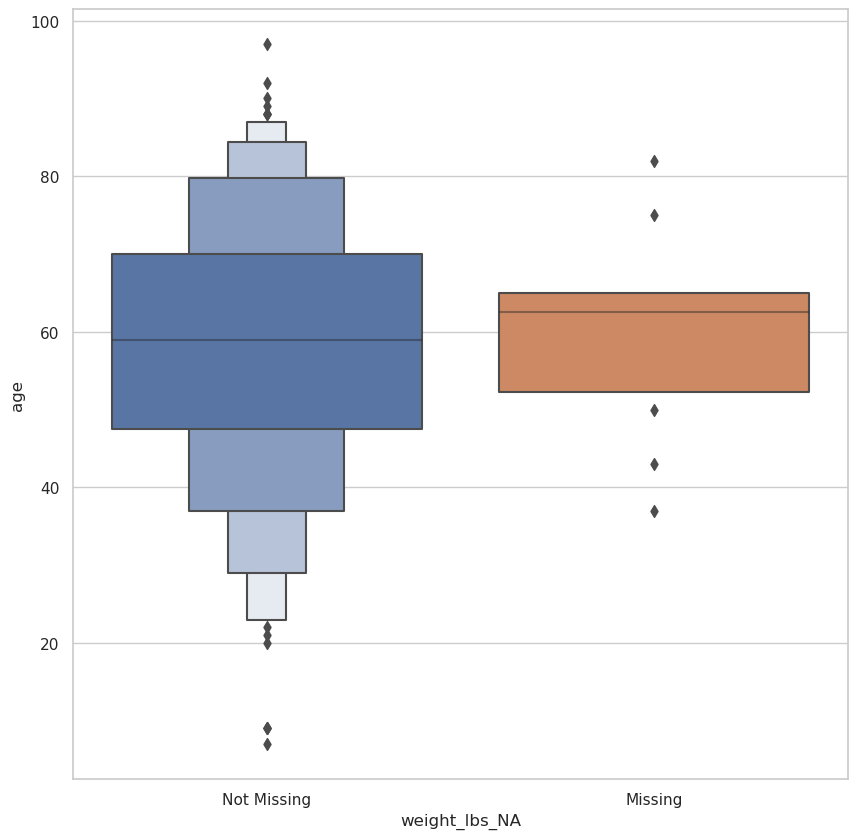

In [63]:
  (
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
      lambda df: (
        sns.boxenplot(
          data=df,
          x="weight_lbs_NA",
          y="age"
        )
      )
    )
  )

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


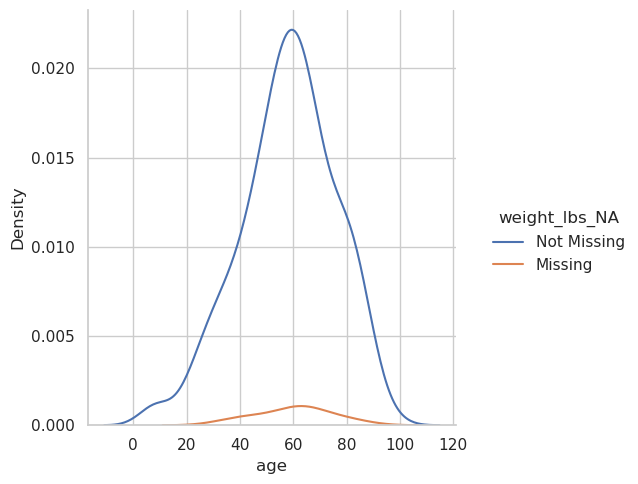

In [64]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
      lambda df: (
        sns.displot(
          data=df,
          x="age",
          hue="weight_lbs_NA",
          kind="kde"
        )
      )
    )
)

Notamos que si se repite esta distribucion pero de una manera mas pequeña

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


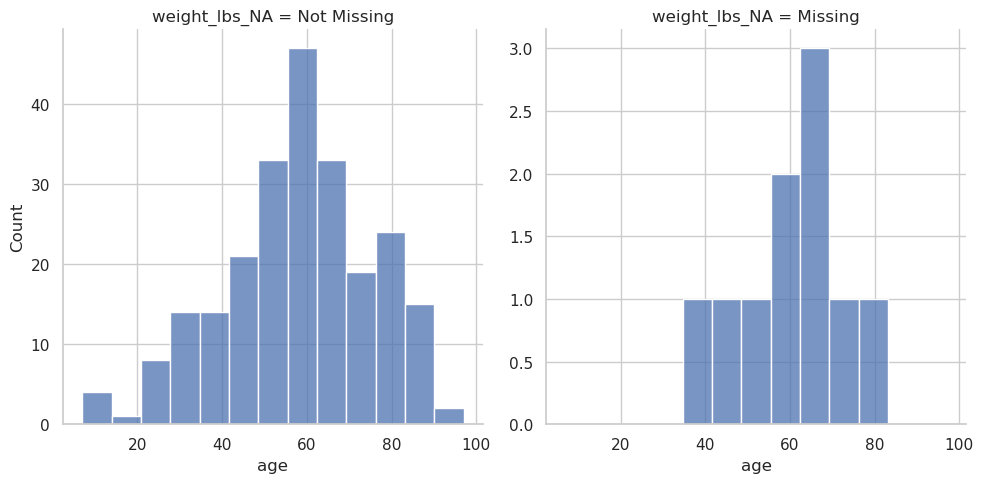

In [65]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
      lambda df: (
        sns.displot(
          data=df,
          x="age",
          col="weight_lbs_NA",
          facet_kws={
              "sharey": False # Hace que cada grafica tenga su propio eje "y" para poder comparar sus formas mejor
          }
        )
      )
    )
)

Tu podrias continuar explorando estas visualizaciones modificando los bins, entre otras muchas cosas mas que hayas aprendido

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


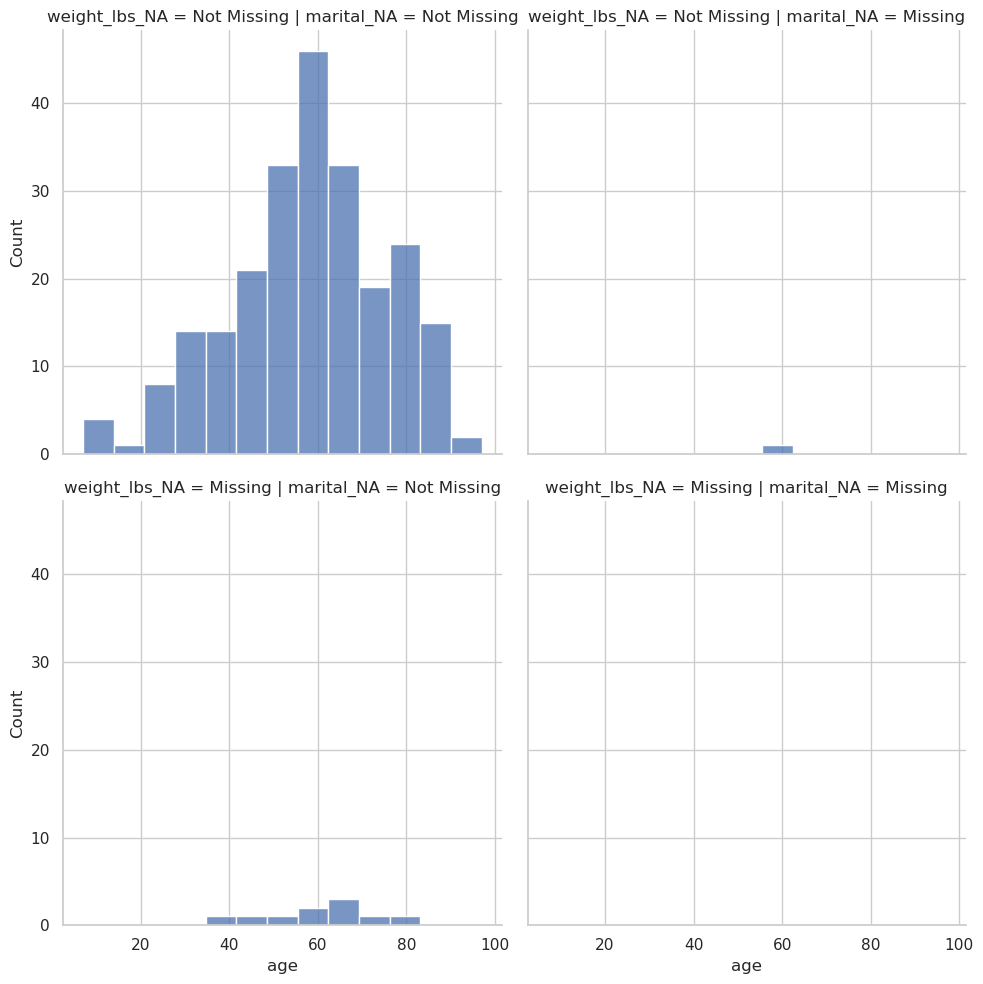

In [66]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
      lambda df: (
        sns.displot(
          data=df,
          x="age",
          col="marital_NA",
          row="weight_lbs_NA"
        )
      )
    )
)

Este grafico es como si dividieramos cada grafico en los valores de dos variables.
Aqui te dejo un ejemplo de lo que hace este grafico 

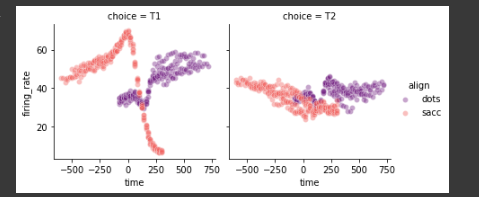

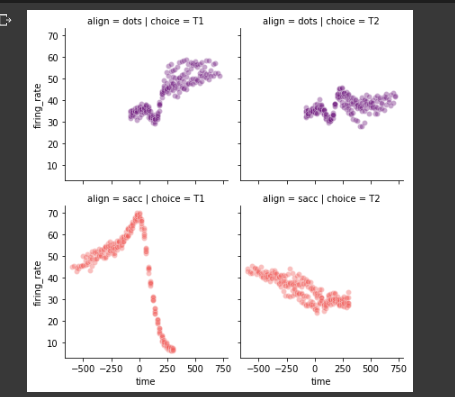

## Visualización de valores faltantes en dos variables

In [67]:
def column_fill_with_dummies(
        column: pd.Series,
        proportion_below: float=0.10,
        jitter: float=0.075,
        seed: int=42
) -> pd.Series:
    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column



Basicamente lo que hace esa funcion es agarrar una columna y a sus valores faltantes, ponerle un valor tan pequeño que al graficarlo con otra variable, quede a un lado de los puntos que si tienen valor.

In [68]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category"
    )
)

age weight_lbs height_inch    bmi  children  health_physical  \
0     49        190          64  32.68         0                3   
1     48        170          68  25.90         0                4   
2     55        163          64  28.04         0                0   
3     42        230          74  29.59         1                0   
4     66        135          62  24.74         0                0   
..   ...        ...         ...    ...       ...              ...   
240   79        144          63  25.56         0                5   
241   45        170          74  21.87         2                0   
242   62        175          71  24.46         0                0   
243   62        138          64  23.74         0                2   
244    9        200          70  28.76         0                0   

     health_mental health_poor drink_days drink_average diet_fruit diet_salad  \
0               15           2        NaN           NaN       1095        261   
1               30           3        NaN           NaN         52        209   
2                0         NaN        NaN           NaN         36        156   
3                0         NaN         15           NaN        NaN        NaN   
4                0         NaN        NaN           NaN         -7        261   
..             ...         ...        ...           ...        ...        ...   
240              1           0        NaN           NaN         -7         -7   
241              0         NaN         30             3         52         52   
242              0         NaN         10             2        365        156   
243              5           0          1             1        730          0   
244              0         NaN         -7            -7         52        104   

    diet_potato diet_carrot diet_vegetable diet_juice  
0           104         156            521         12  
1            52           0             52          0  
2            52          24             24         24  
3           NaN         NaN            NaN        NaN  
4           209         261            365        104  
..          ...         ...            ...        ...  
240          -7          -7             -7         -7  
241          52          24             52         24  
242         104          52            730        365  
243          24         156            104          0  
244          52           0            104        104  

[245 rows x 16 columns]

In [69]:
column_fill_with_dummies(column=riskfactors_df["drink_days"])

0      -12.85447
1     -11.169161
2     -11.808918
3             15
4     -12.198924
         ...    
240   -12.962476
241           30
242           10
243            1
244           -7
Name: drink_days, Length: 245, dtype: object

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

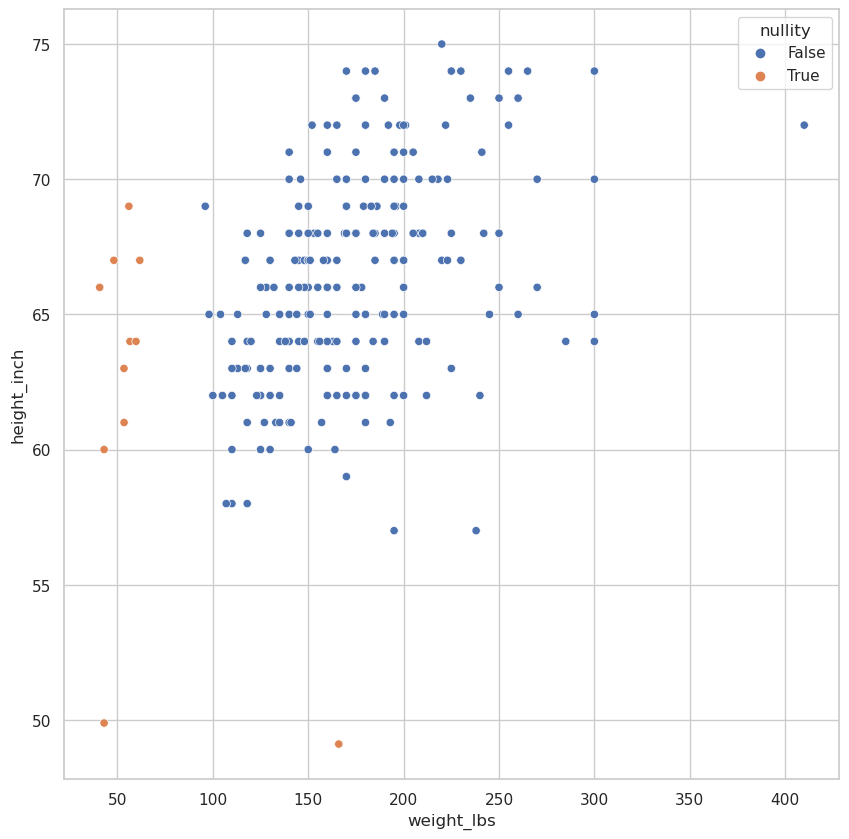

In [70]:
(
    riskfactors_df
    .select_dtypes(
        exclude="category" # Trae las columnas de tipo int
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] # Trae las columnas que tienen valores faltantes, esto es solo para que el ejemplo sirva
    )
    .missing
    .bind_shadow_matrix(true_string = True, false_string = False) # Trae nuestra shadow matrix pero con True y False 
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column) # Le aplica la funcion que creamos anteriormente solo a las variables que no tienen "_NA"
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA # Crea una columna llamada nullity que lo que hace es ver si alguna coordenada de esas dos variables tiene un valor faltante y si si lo tiene, le pone True. De esta manera lograremos darle un color diferente a los valores faltantes y no faltantes
    )
    .pipe( # Graficamos
        lambda df: (
            sns.scatterplot( 
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

Los valores naranjas, dependiendo de que lado se ubican, son valores que si tienen valor para la variable en donde se ubican y para la otra no.

Podriamos llegar a tener graficos tan sofisticados como el siguiente que ya tienen hasta un box plot para valores faltantes y no faltantes de cada variable: 

Vamos a seguir explorando como a los datos faltantes (de height por ejemplo) agregarles su respectivo weight y posicionarlos dentro del grafico y no a un costado, para asi ver si preservan la relacion entre las variables. Y esa va ser una tecnica que lo que le importa es preservar la estructura de nuestros datos, sus relaciones. Todo esto eliminando los datos faltantes y cambiandolos por otros

Este tipo de grafico te ayudara a identificar donde se estan acumulando tus puntos faltantes y ademas tambien, te ayudara a identificar si añadiendo valores reales a estos puntos le dara sentido o no a la relacion que sigue ese conjunto de datos

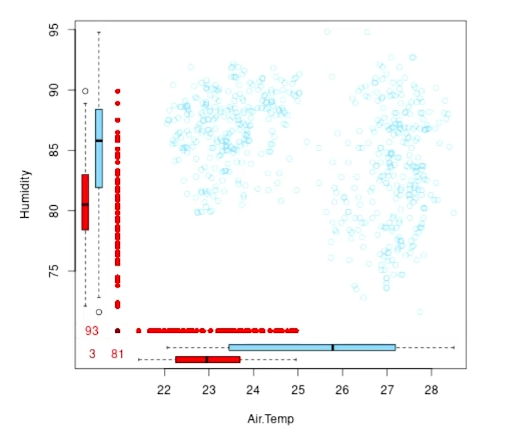

Para este ejemplo, los puntos azules indican que existe valores tanto para la temperatura como para la humedad. Los puntos rojos indican que solo hay valores para una de las variables y no para la otra. Este tipo de grafica nos ayuda a conocer donde estan agrupados los valores faltantes respecto a otras variables y se grafican fuera de la presencia de los puntos reales para que no introduzcan ruido.

Ademas podemos incluir otro tipo de graficos como los boxplot que nos ayudan a compara la distribucion de los datos de las variables con la distribucion de los datos faltantes y a visualizar si se estan acumulando en un espacio del scatterplot

Este tipo de analisis es importante porque al realizar un EDA sobre los datos faltantes queremos saber si estos siguen una relacion, una tendencia, un comportamiento caracteristico que podamos rellenar segun su variabilidad.

Con una instruccion de la pandas-missing-extension.ipynb

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

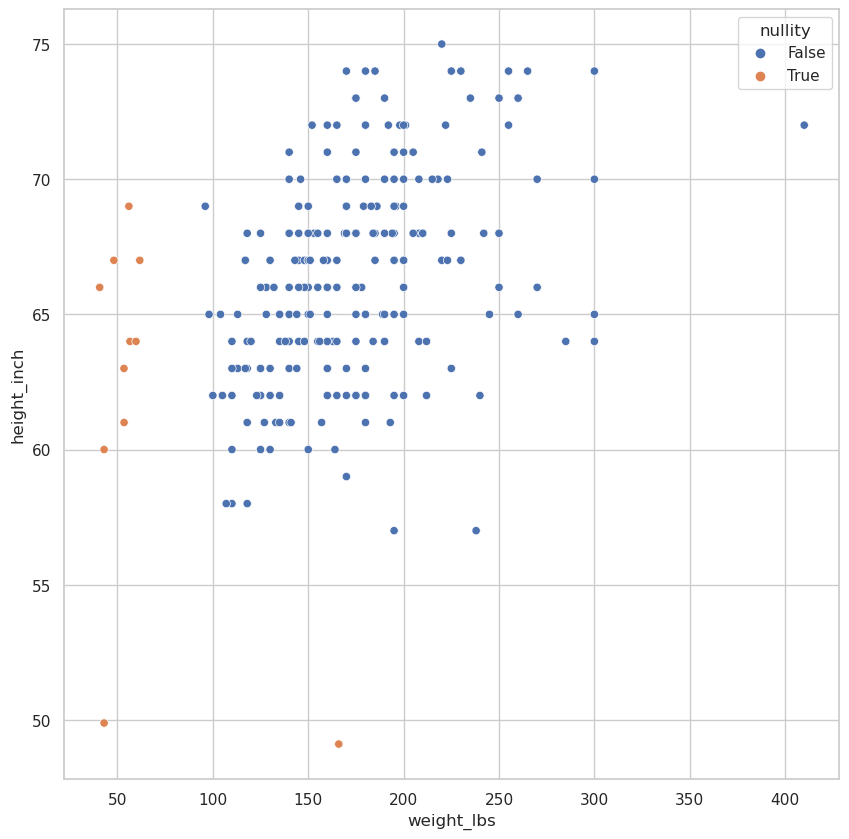

In [71]:
(
    riskfactors_df
    .missing
    .scatterplot_two_variables("weight_lbs", "height_inch")
)

## Correlación de nulidad

<Axes: >

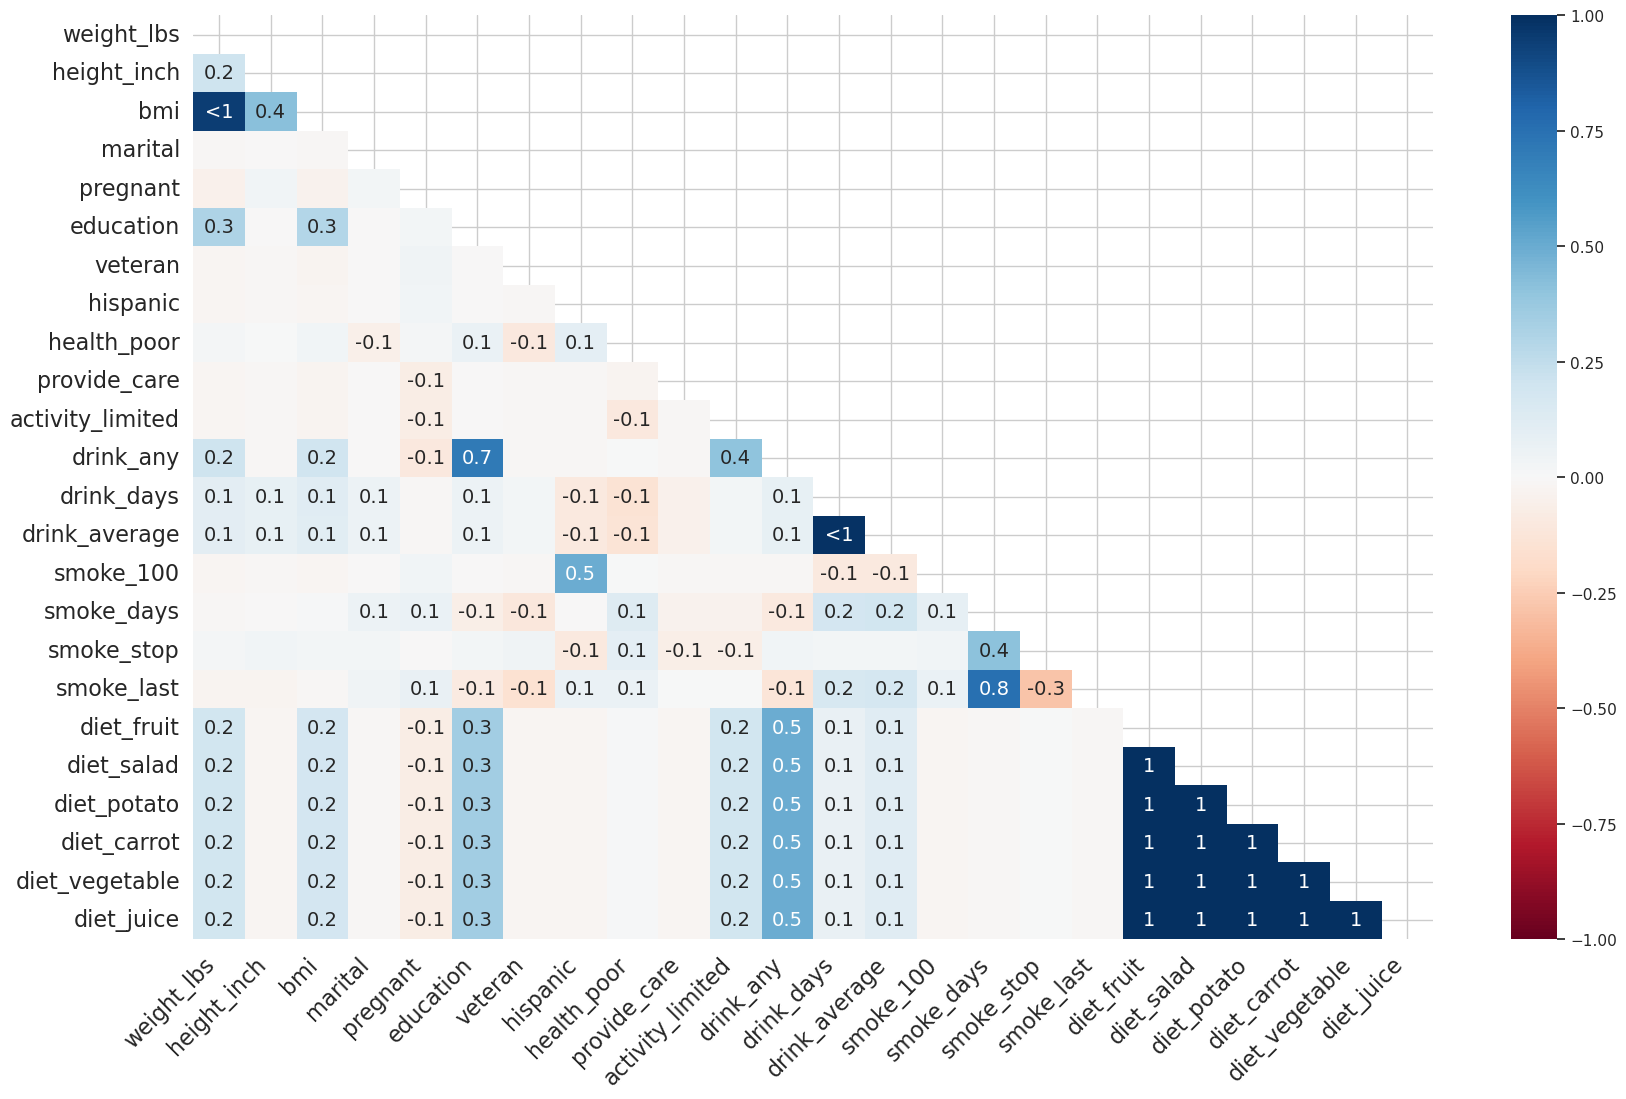

In [72]:
missingno.heatmap(
    df=riskfactors_df
)

Mientras mas cerca de 1, significa que las dos tienen un valor nulo en la misma observacion. Mientras mas cerca de -1 significa que mientras una tiene valor nulo, la otra no. Y cuando esta muy cerca de 0 significa que no tienen relacion alguna

Los valores coloreados de color gris representan que no hay una correlacion ni positiva ni negativa entre las valores faltantes de las variables

El <1 indica que esta muy cerca de 1

<Axes: >

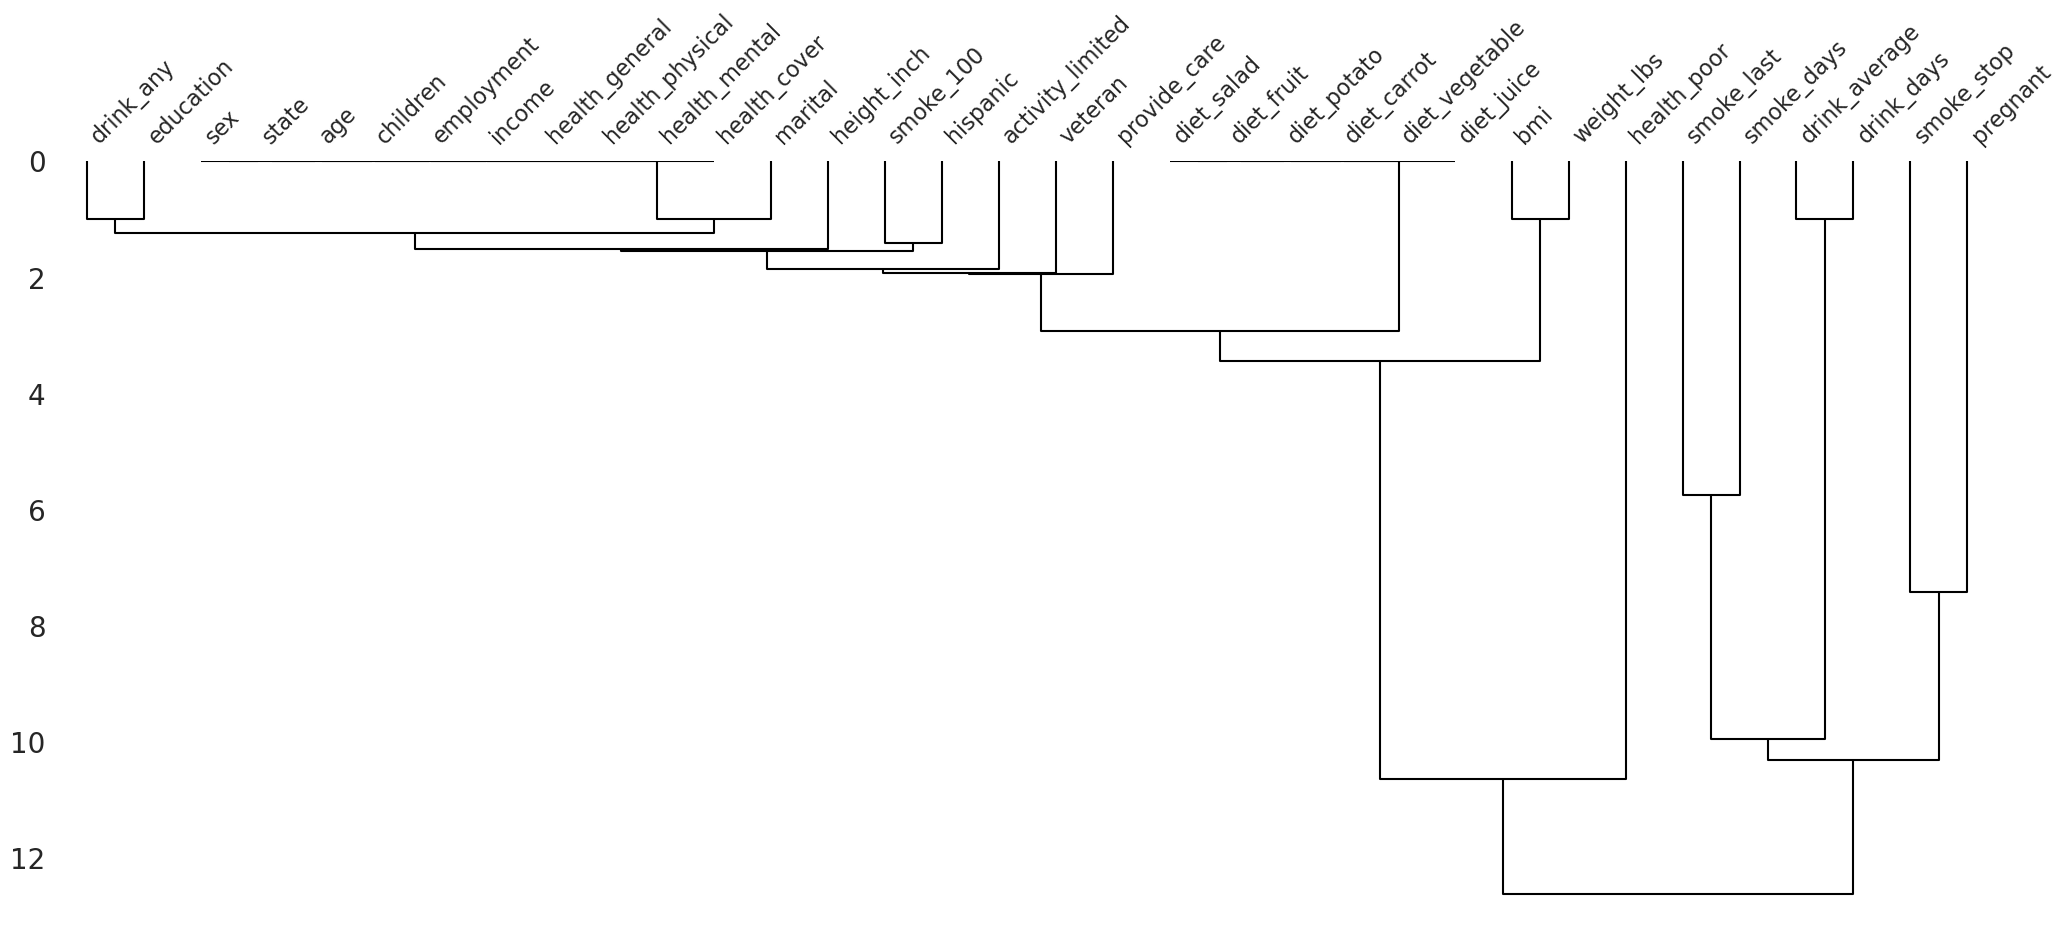

In [73]:
missingno.dendrogram(
    df = riskfactors_df
)

Mientras mas larga sea la linea vertical que une las variables, menos relacion hay entre las variables. Pero mientras mas pequeña, mas relacionadas estan. Toma en cuenta que me refiero a la relacion que hay entre sus valores nulos. Lo malo de esta es que no nos dice si es una correlacion negativa o positiva

Las variables que estan agrupadas cerca del nivel base indican que la presencia de valores faltantes estan muy relacionadas entre si

Mientras mas separado esten las variables en el diagrama es menos probable que los valores faltantes esten correlacionados entre las columnas

Aqui te dejo un ejemplo de como entender un dendograma:

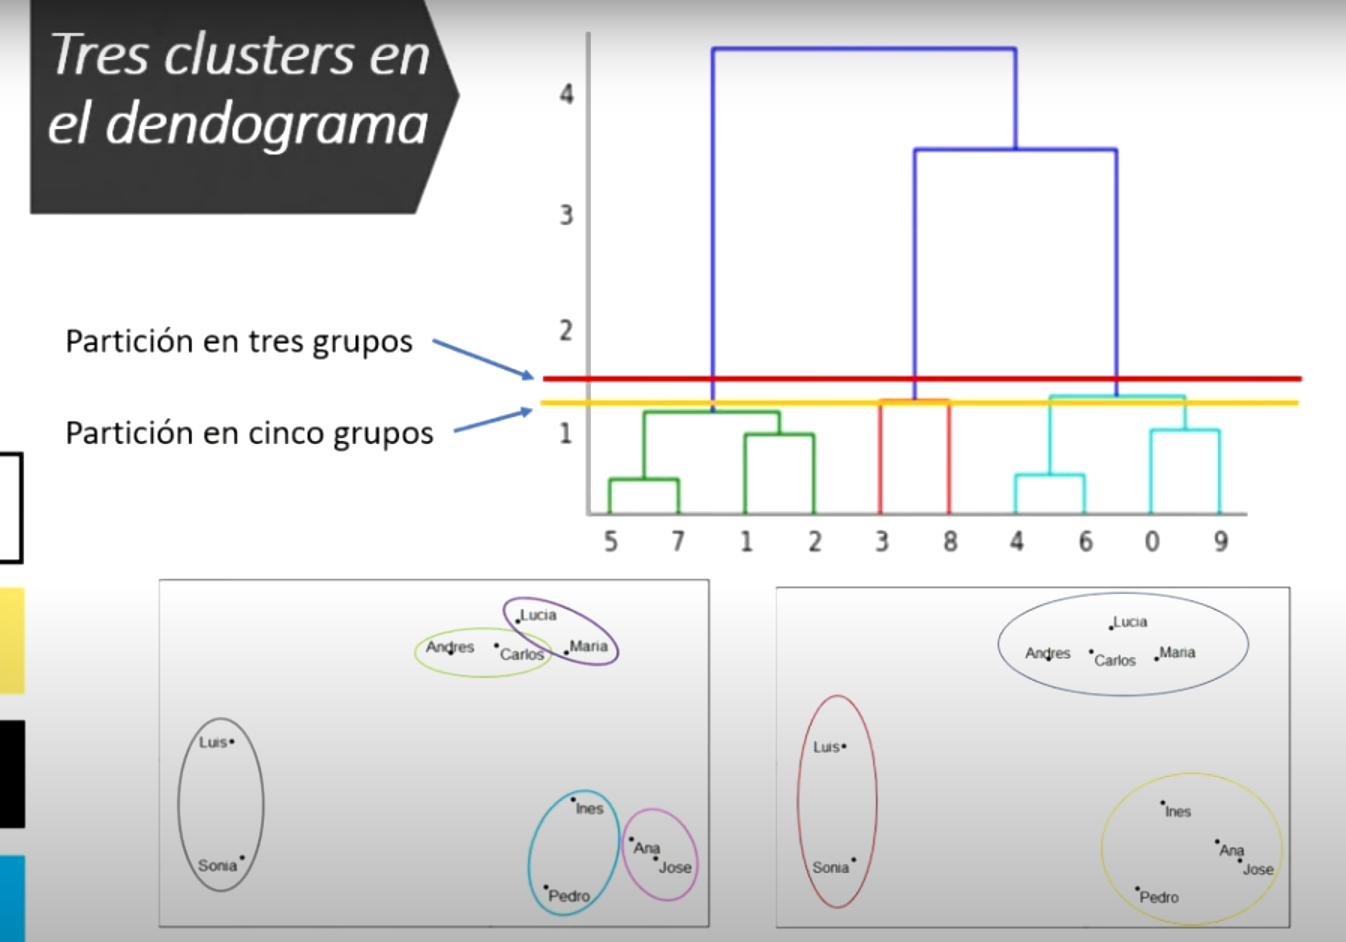

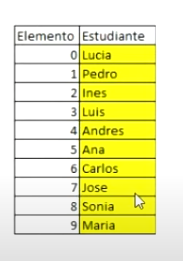

Ignora lo de las particiones

Mientras mas sea la altura entre las conexiones, significa que estan menos relacionados

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [74]:
riskfactors_df.shape

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

In [79]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [81]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

Basicamente lo que hace pandas en todas sus funciones de calculo, es ignorar los valores faltantes, esto nos puede ayudar si nuestros valores faltantes no son muchos, pero si son muchos ten cuidado porque podrias estar introduciendo sesgos en tus calculos

In [83]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

Con esto evitamos que pandas utilice por defecto pairwise deletion y si hay un valor nan, el valor total del calculo sera siempre nan

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [85]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs"], # Si encuentra un valor faltante en esa columna, eliminara la fila completa
        how="any" # Algoritmo usado, no importa tanto
    )
    .shape
)

(235, 34)

#### Con base en 2 o más columnas

In [86]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"], # Si encuentra un valor faltante en esa columna, eliminara la fila completa
        how="any" # Indica que en este caso eliminara la fila si en alguna de las dos hay un valor faltante
    )
    .shape
)

(234, 34)

In [87]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"], # Si encuentra un valor faltante en esa columna, eliminara la fila completa
        how="all", # Indica que eliminara la fila cuando en estas dos variables no haya valor al mismo tiempo

    )
    .shape
)

(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

<Axes: >

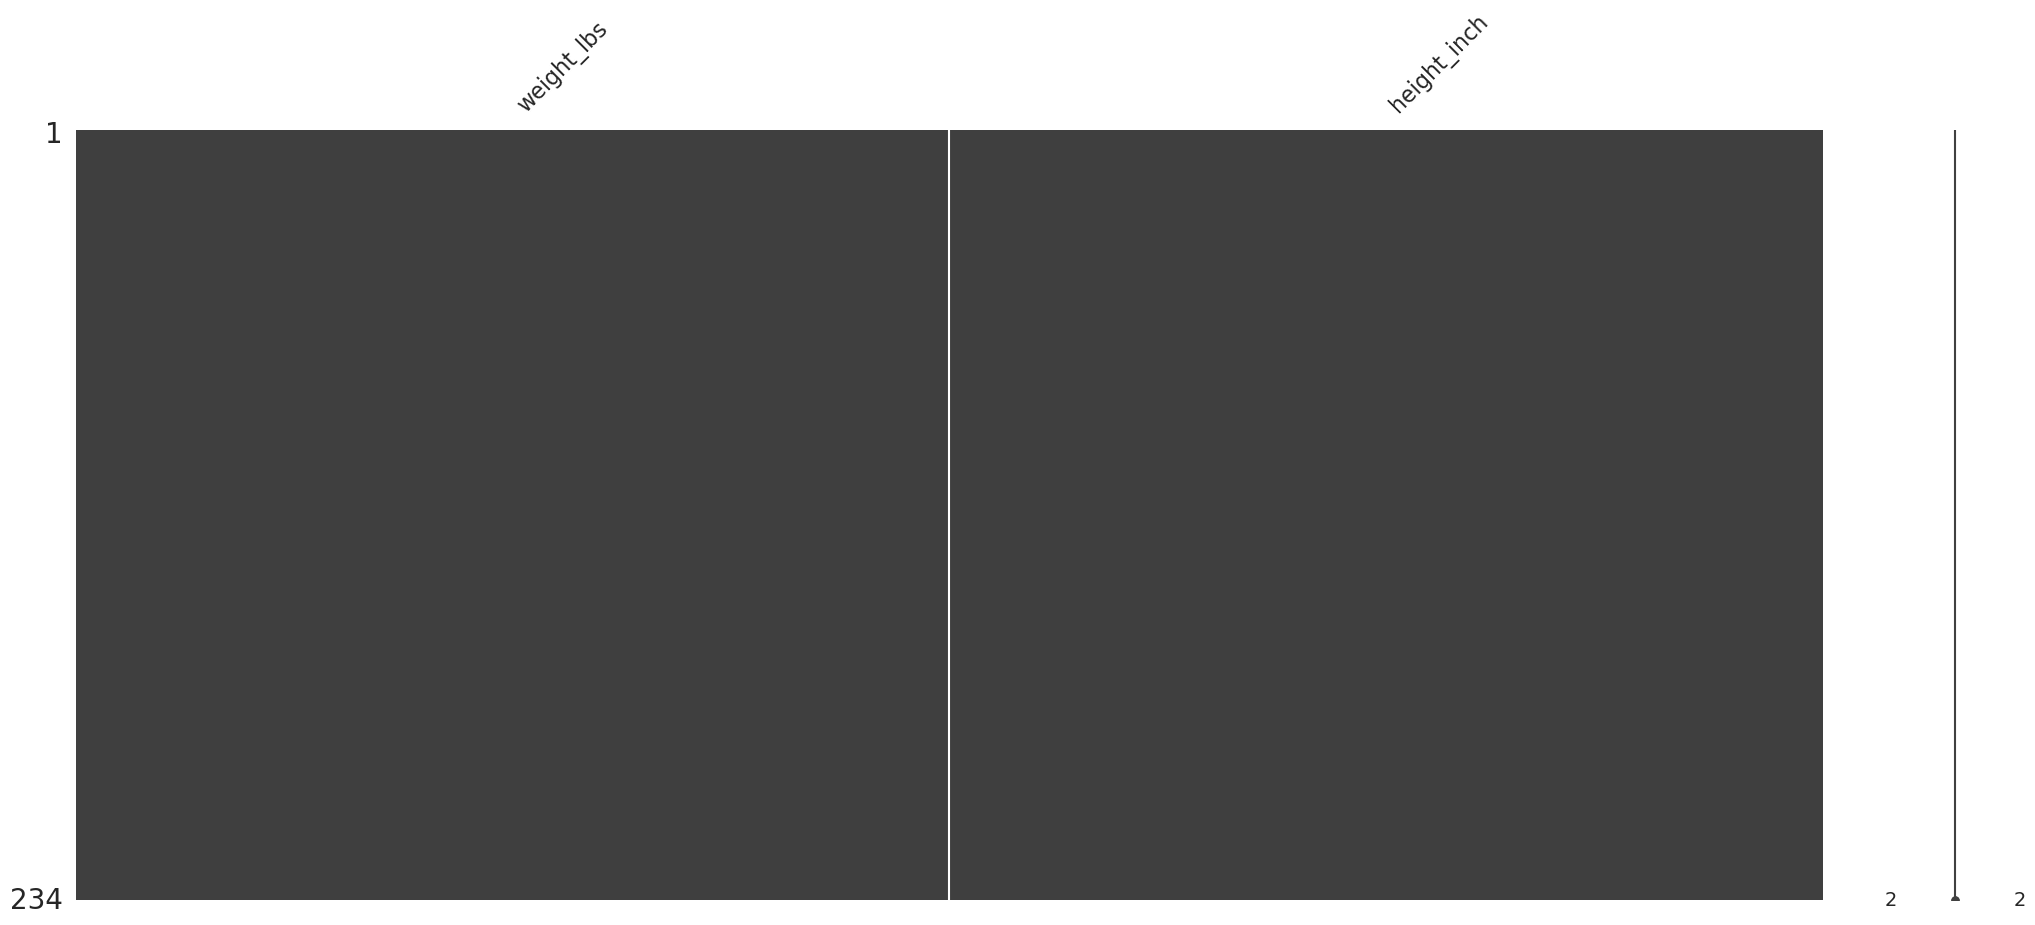

In [90]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"], # Si encuentra un valor faltante en esa columna, eliminara la fila completa
        how="any" # Indica que en este caso eliminara la fila si en alguna de las dos hay un valor faltante
    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(missingno.matrix)
)

<Axes: >

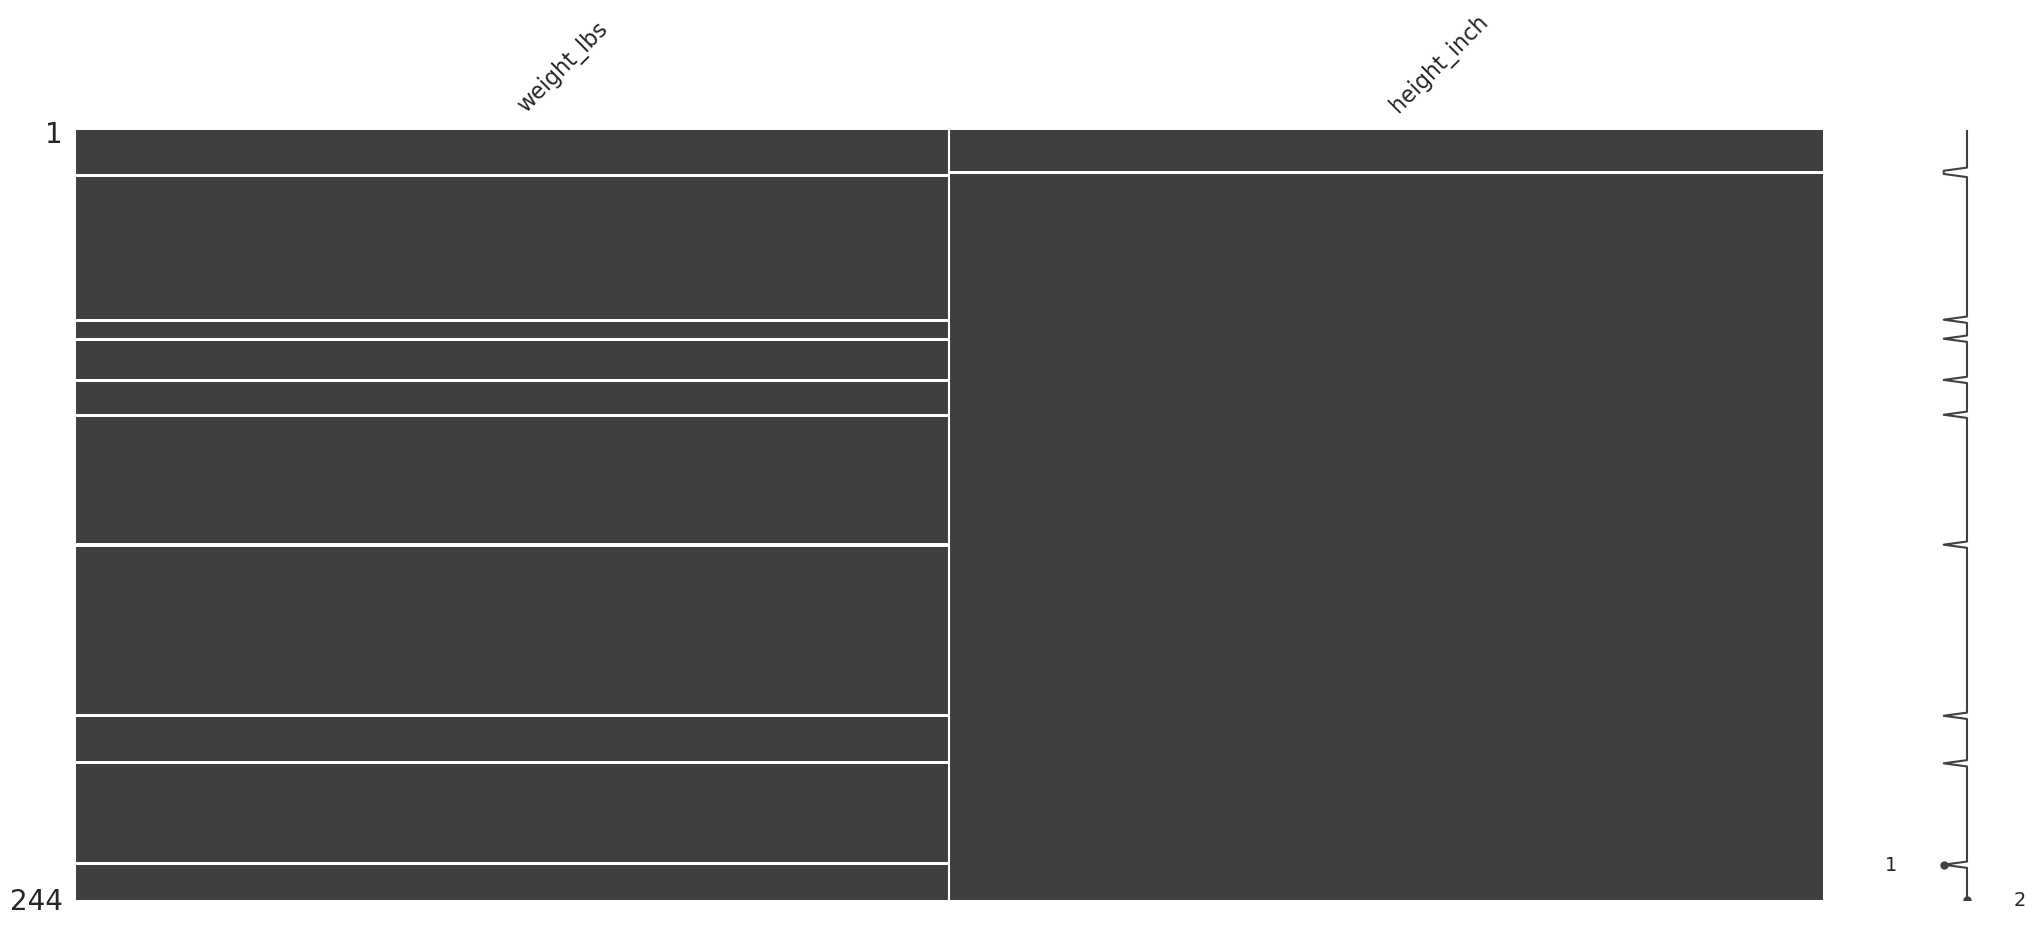

In [92]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"], # Si encuentra un valor faltante en esa columna, eliminara la fila completa
        how="all", # Indica que eliminara la fila cuando en estas dos variables no haya valor al mismo tiempo

    )
    .select_columns(["weight_lbs", "height_inch"])
    .pipe(missingno.matrix)
)

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [75]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

name       time  value
0        lynn    morning    350
1         NaN  afternoon    310
2       zelda    morning    320
3         NaN  afternoon    350
4  shadowsong    morning    310
5         NaN  afternoon    320

In [94]:
implicit_to_explicit_df.ffill() # El valor faltante sera remplazado por el valor de arriba

name       time  value
0        lynn    morning    350
1        lynn  afternoon    310
2       zelda    morning    320
3       zelda  afternoon    350
4  shadowsong    morning    310
5  shadowsong  afternoon    320

### Imputación de un único valor

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


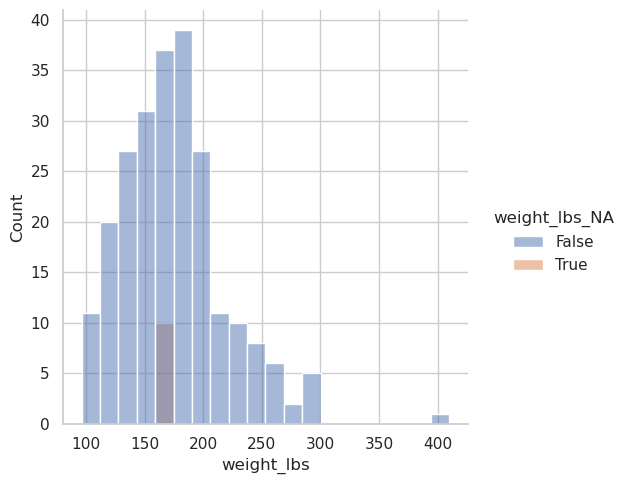

In [98]:
(
    riskfactors_df
    .select_columns(["weight_lbs", "height_inch", "bmi"])
    .missing
    .bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA"
            )
        )
    )
)

Imputamos los valores faltantes con el promedio de su respectiva columna

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

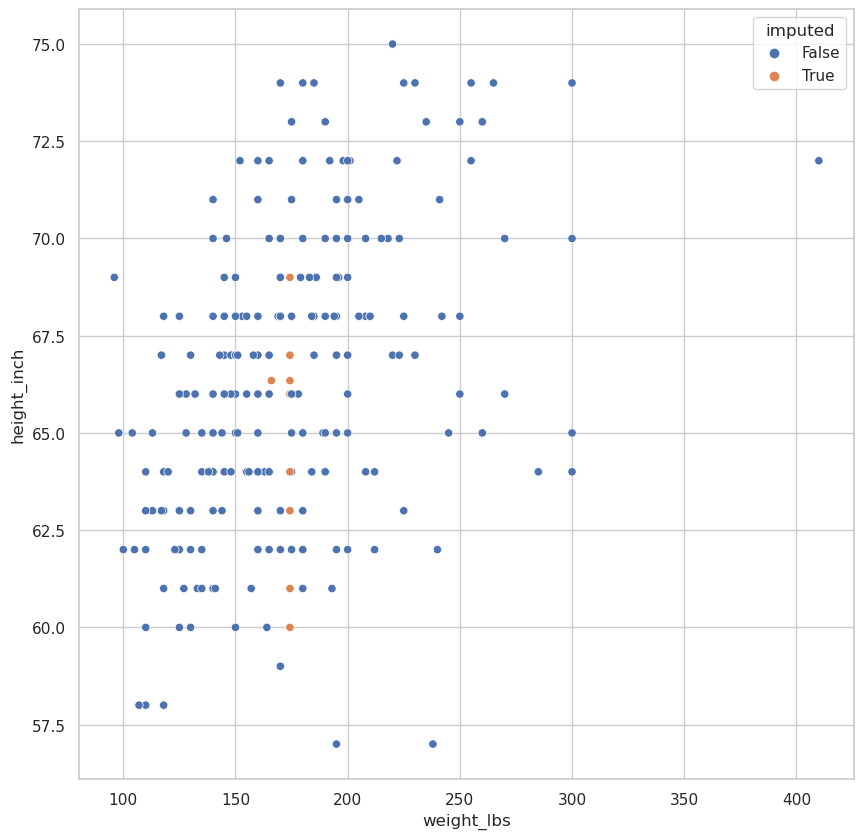

In [100]:
(
    riskfactors_df
    .select_columns(["weight_lbs", "height_inch", "bmi"])
    .missing
    .bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA # Agregamos una columna que diga si un valor fue inputado o no
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)

Esto te recuerda al grafico que hicimos donde los valores faltantes estan a un costado del grafico. En este caso ya hemos hecho que no sean faltantes y esten dentro del grafico

Es importante notar que al imputar los datos, no rompimos la relacion entre nuestros datos. En otras ocasiones podras observar como esos puntos pueden romper la relacion, lo cual seria una imputacion mala

/home/victorwkey/anaconda3/envs/curso-datos-faltantes/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


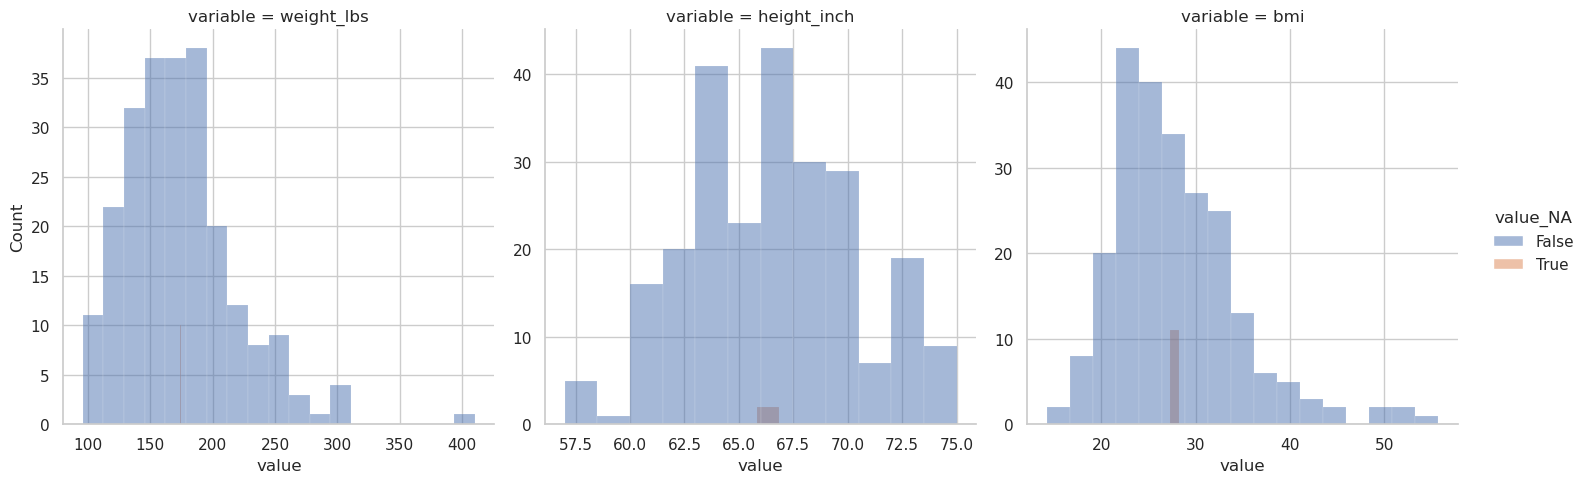

In [114]:
(
    riskfactors_df
    .select_columns(["weight_lbs", "height_inch", "bmi"])
    .missing
    .bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", "value"],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func = lambda column: column.variable in column.variable_NA) # Esto se hizo porque habian columnas que no eran validas y se estaba produciendo un producto cartesiano. La verdad no entendi esta parte
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False, # Para que no tengan los mismos bins
                facet_kws={ # Para que no tengan el mismo eje x y y
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )

)

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [76]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>